<a href="https://colab.research.google.com/github/GiammarcoBozzelli/green-patents/blob/main/final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/edoardochiarotti/class_datascience/blob/main/2023/02_Data-Cleaning/Resources/02_Data-acquisition-cleaning-Panda.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final notebook - Elephant Group

1. Context and research question
2. Discussion on causality and methodology
3. Data sources and possible biases in the data
4. Visual presentation of results
5. Critical discussion of limitations and extensions

# In the Face of Adversity: Weather Shocks' Influence on Green Innovation

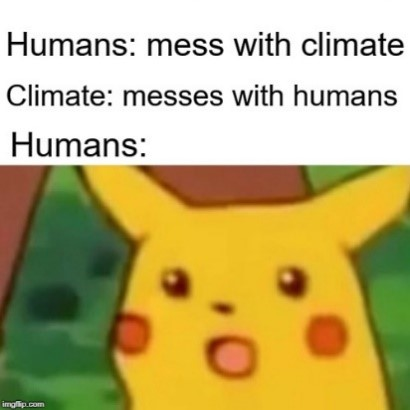

In [ ]:
display(Image(filename='/content/drive/MyDrive/ELEPHANT/knowyourmeme1.jpg'))

As the world grapples with the intensifying effects of climate change, extreme weather events are becoming increasingly frequent and severe. Green innovation, the development of environmentally friendly technologies and practices, holds immense potential to mitigate the impacts of climate change and foster sustainable economic growth. Understanding the complex interplay between extreme weather events and green innovation in the current economic landscape is crucial for navigating the challenges and opportunities presented by the evolving climate crisis.

As climate-related disasters become more frequent and severe, understanding how these events influence a nation's commitment to environmentally friendly technologies is a topic of paramount importance. The study aims to shed light on whether the adversity of extreme weather events serves as a catalyst for fostering green innovation or if it presents an obstacle to sustainable development. There are two main questions we will try to unswer:

***H1: What is the impact of extreme weather events on green innovation?***

***H2: Is the impact consistent across different countries?***


Panel data from 101 countries from 1977 to 2021 is used to look at the connection between extreme weather shocks and green innovation adopting a panel fixed-effect model. Ultimately, a collective significantly negative effect of extreme weather events on green innovation has been found (H1).

Further diving into specific countries to analyse if these results also hold in country specific contexts. The way we test this is by using two Diff-in-Diff models, one for two developed countries (Germany and Belgium) and the other with two developing countries (Thailand and Manila). With surprise, we see from the specifics of the countries the results are opposite when analysing single countries, with extreme events having a positive effect on green innovation for developed countries and a negative one for those under development (H2).


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


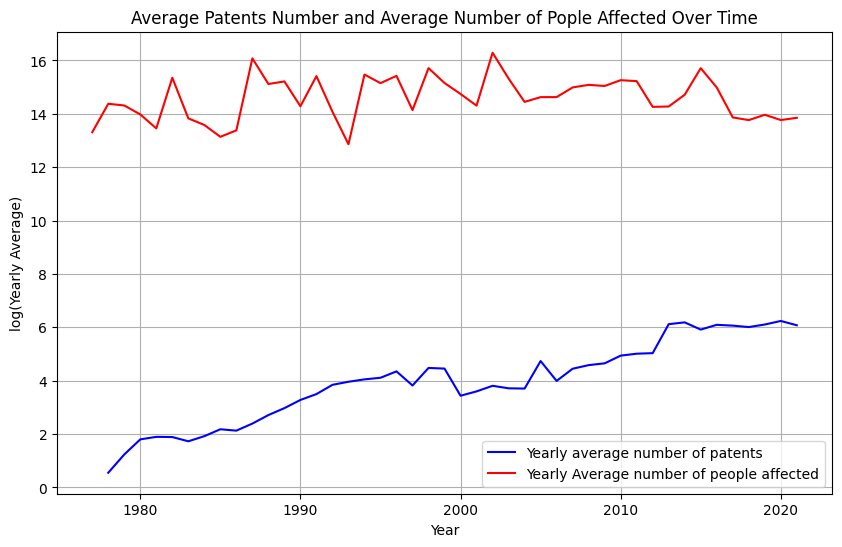

In [ ]:
avg_patents_by_year = merged_final.groupby('Year')['patents_number'].mean().reset_index().dropna()
avg_damage_by_year = merged_final.groupby('Year')['total_affected'].mean().reset_index().dropna()
plt.figure(figsize=(10, 6))
plt.plot(avg_patents_by_year['Year'], np.log(avg_patents_by_year['patents_number']), linestyle='-', color='b', label='Yearly average number of patents')
plt.plot(avg_damage_by_year['Year'], np.log(avg_damage_by_year['total_affected']), linestyle='-', color='r', label='Yearly Average number of people affected')

plt.title('Average Patents Number and Average Number of Pople Affected Over Time')
plt.xlabel('Year')
plt.ylabel('log(Yearly Average)')
plt.legend()
plt.grid(True)
plt.show()

# Methodology

Justify which variables will be used and why (DAG)

1.   List item
2.   List item





Data illustration and basic EDA



# Panel Data

Following is the formula for the regression used to investigate the relation between green innovation proxied by patents applications and extreme weather events:

$\text{Patents}_{it} = \beta_0 + \beta_1 \cdot \text{Total Affected}_{it} + \alpha_i + \gamma_t + \epsilon_{it}$


* $\text{Patents}_{it}$ = the number of environmental-related technology patents applications for 'Country i' in 'Year t'
*   $\text{Total Affected}_{it}$ =  the number of people affected by extreme weather events for 'Country i' in 'Year t'
* $α_{it}$ = Counutry level fixed effects,  accounting for unobserved heterogeneity across countries that doesn't change over time
* $γ_{it}$ = Time level fixed effects, capturing factors that affect countries uniformly during a specific year period.
* $ϵ_{it}$ = error terms, representing unobserved factors or random disturbances.


First we try to run the model only between the number of patents applications and the number of total people affected and we get an estimated coefficient for $\text{Total Affected}$ of $+1.318 \times 10^{-6}$, significant only at the $6\%$ level.

In [ ]:
# raw regression without fixed effects nor controls
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          146.92     14.999     9.7951     0.0000      117.50      176.34
total_affected  1.318e-06  7.037e-07     1.8726     0.0613  -6.231e-08   2.698e-06


In [ ]:
HTML(r'<div class="tenor-gif-embed" data-postid="17361118" data-share-method="host" data-aspect-ratio="0.940625" data-width="25%"><a href="https://tenor.com/view/hold-on-wait-a-minute-somethings-aint-right-hold-up-somethings-wrong-here-gif-17361118">Hold On Wait A Minute GIF</a>from <a href="https://tenor.com/search/hold+on-gifs">Hold On GIFs</a></div> <script type="text/javascript" async src="https://tenor.com/embed.js"></script>')

This would contradict the agreement present in the literature related to the negative effects of extreme weather events and green innovation.

Next, we progressively add control variables until reaching this final model:

$\text{Patents}_{it} = \beta_0 + \beta_1 \cdot \text{Total Affected}_{it} + \beta_2 \cdot \text{GDP}_{it} + \beta_3 \cdot \text{FDI}_{it} + \beta_4 \cdot \text{Consumption}_{it} + \beta_5 \cdot \text{Population}_{it} + \beta_6 \cdot \text{Tertiary}_{it} + \alpha_i + \gamma_t + \epsilon_{it}$




* $\text{GDP}_{it}$: Gross Domestic Product. Economic conditions may influence the number of green patents applications. A growing economy has been shown to have  more resources for innovation.

* $\text{FDI}_{it}$: Foreign Direct Investment. Countries with more FDI might have more international collaboration and knowledge transfer.

* $\text{Consumption}_{it}$: Represents the consumption level. Included to capture the overall economic activity in the country, higher consumpions maight indicate and higher williness to use new technologies.

* $\text{Population}_{it}$: The population of the region or country. Larger populations may drive higher demand for sustainable technologies, contributing to more green patents or simply increasing the number of applications.

* $\text{Tertiary}_{it}$: The proportion of the population involved in tertiary education (e.g., universities, research institutions). This variable is used to capture the level of education and research activity, influencing innovation.


Running the model provides a final coefficient for ${Total Affected}$ equal to $-2,643  \times 10^{-6}$ statistically significant below the $1\%$ level. This suggests that the occurrence of extreme weather events causes a decrease in the number of environmental related patents applications, meaning a reduction in the level of green innovation in the effected countries. The results are congruent with those found in the literature and are statistically significant. More precisely we see that all variables, except for $\text{Tertiary}$ contribute in improving the statistically significance of the results and are significant far below the $\text{1%}$ level.

In [ ]:
# same regression using total_damage and indipendent
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + FDI + consumption + Population + Tertiary + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -1112.0     180.46    -6.1620     0.0000     -1465.9     -758.05
total_affected -2.643e-06  6.204e-07    -4.2608     0.0000   -3.86e-06  -1.427e-06
GDP                0.0174     0.0018     9.9367     0.0000      0.0140      0.0208
FDI             4.836e-09  3.029e-10     15.968     0.0000   4.242e-09    5.43e-09
consumption        11.300     2.1114     5.3521     0.0000      7.1594      15.441
Population      1.752e-06  2.974e-07     5.8913     0.0000   1.169e-06   2.336e-06
Tertiary          -1.0698     1.0320    -1.0366     0.3001     -3.0939      0.9543


A possible explanation for the negative coefficient is that following such extreme events, governments tend to shift their effort and resources towards disaster response and recovery effects, reallocating research and development funds away from green innovation initiatives. Furthermore, physical damages to buildings may also affect research facilities and crucial infrastructure needed for technological advancements diverting financial resources towards reconstructions rather than green projects. Looking at a broader picture, countries affected by extreme shocks may result in less attractive markets for investors, decreasing the fundings for longer terms projects, that are typical when doing research and development for new technologies.  

Another explanation may be given looking at the human aspects of such events. People affected may need to stop going to work for transport  limitations and also economics limitations driven by the need to cope with the damages of extreme events may limit their ability to focus their resources on more essential needs rather then on new technologies.




# Let's focus on single countries now

In this section, we delve deeper into understanding the causal relationship between weather shocks and the application of green patents, employing the difference-in-differences (DID) method. In essence, the DID framework in econometrics assesses changes in an outcome between two groups over time to estimate the treatment's causal impact, which is in our case the occurence of a weather shock. One group encounters the weather shock (treated group), while the other remains unaffected (control group). The model calculates the difference in changes between the control and treatment groups, assuming any pre-threshold differences in trends arise from factors apart from the shock itself, and any post-threshold differences are due to the shock.

To better grasp the model, let's start by elucidating the theoretical rationale behind it. Essentially, we construct a dataset using two sets of dummy variables: the first set distinguishes between before $(\text{t}_{0})$ and after $(\text{t}_{1})$ the treatment, and the second set categorizes the treated $(\text{D}_{1})$ and control $(\text{D}_{0})$ groups. As depicted in the table below, each cell represents $\text{Y}_{it}$.




|                   | Before the Treatment | After the Treatment |
|-------------------|:---------------------:|:--------------------:|
| **Treated Group** | $\text{Y}_{i0}$  𝗜 $\text{D}_{1}$          | $\text{Y}_{i1}$  𝗜 $\text{D}_{1}$        |
| **Control Group** | $\text{Y}_{i0}$  𝗜 $\text{D}_{0}$         | $\text{Y}_{i1}$  𝗜 $\text{D}_{0}$            |

To better understand the table you can refere to the graphe below, where :  
* $a$ represent $\text{Y}_{i0}$  𝗜 $\text{D}_{0}$
* $b$ represent $\text{Y}_{i1}$  𝗜 $\text{D}_{0}$
* $c$ represent $\text{Y}_{i0}$  𝗜 $\text{D}_{1}$
* $d$ represent $\text{Y}_{i1}$  𝗜 $\text{D}_{1}$
* $d'$ represent the hypothetical reaction that would have the tested group without treatment


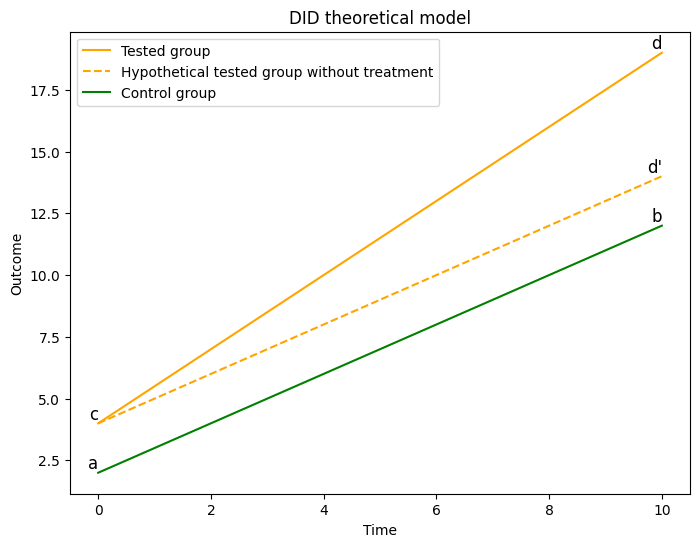

In [ ]:
graphe()

In the graph, the orange line  represents the tested group, while the green line represents the control group. Hence, 'a' and 'c' denote the situation before the treatment, and 'b' and 'd' denote the situation after the treatment. The essence of the DID model lies in assessing the changes attributed to the treatment. It operates under the assumption that, in the absence of treatment, the tested group would follow the trend of the control group, illustrated by the orange dotted line. The treatment's impact is evaluated by measuring the difference between 'd ' and 'd' ', represented by the Greek letter $Δ$. Thus, $Δ = d - d' = (d - c) - (b - a)$.


Mathematically, the formula is represented as $\text{Y}_{it}$ = $\text{β}_{1}$ + $\text{β}_{2}$ $\text{t}$ + $\text{β}_{3}$ $\text{D}_{i}$ + $\text{β}_{4}$ $\text{D}_{i}$ $\text{t}$ + $\text{ϵ}_{i}$

Where :
* $\text{β}_{1}$ is the initial constant  
* $\text{β}_{2}$ is the effect of the time on both groups
* $\text{β}_{3}$is the difference before treatment between both groups
* $\text{β}_{4}$ is the measured effect of the treatment, which represents Δ

###Germany and Belgium

Now that the model is set, let's delve into the rationale behind its use in our study. We employ the DID model to evaluate whether we can reliably infer that extreme weather events indeed impact the application of green patents. Our aim was to select two countries that are not only geographically and culturewise close, minimizing the influence of omitted variables, but also feature one with a significant event and the other without.

Thus, our initial considerations focused on Germany and Belgium for control purposes. They are neighboring countries, exhibiting similar GDP per Capita (Germany in 2022 `$48,432`, Belgium in 2022 `$49,582`), climate worriness (Germany in 2022 `75%`, Belgium in 2022 `69%`) and a high level of secondary education (Germany in 2021 `101%`, Belgium in 2021 `141%`). We presume these factors to remain consistent over the years. Additionally, to address differences in the countries' demographic sizes, we will evaluate the number of patents per capita. We also applied a ratio between the total affected per year and the total number of catastrophes for the same year to scale the differences between events. Indeed, we assume that a major flood affecting a significant number of people has a greater impact than several floods with less affected people. Hence, the ratio single out years with a significant number of severe events in terms of total affected, rather than emphasizing years with a high number of events.

--> could talk as well of the FDI

Considering the graph below, we note that in 1993, 1999 and 2002 Germany witnessed peaks in the ratio, unlike Belgium. We decided to take the highest peak in 2002 to evaluate whether catastrophes influence people's engagement in Research & Development for patents. Hence, we will set the threshold year for the DID model as 2002, with Germany as the treated group and Belgium as the control group.

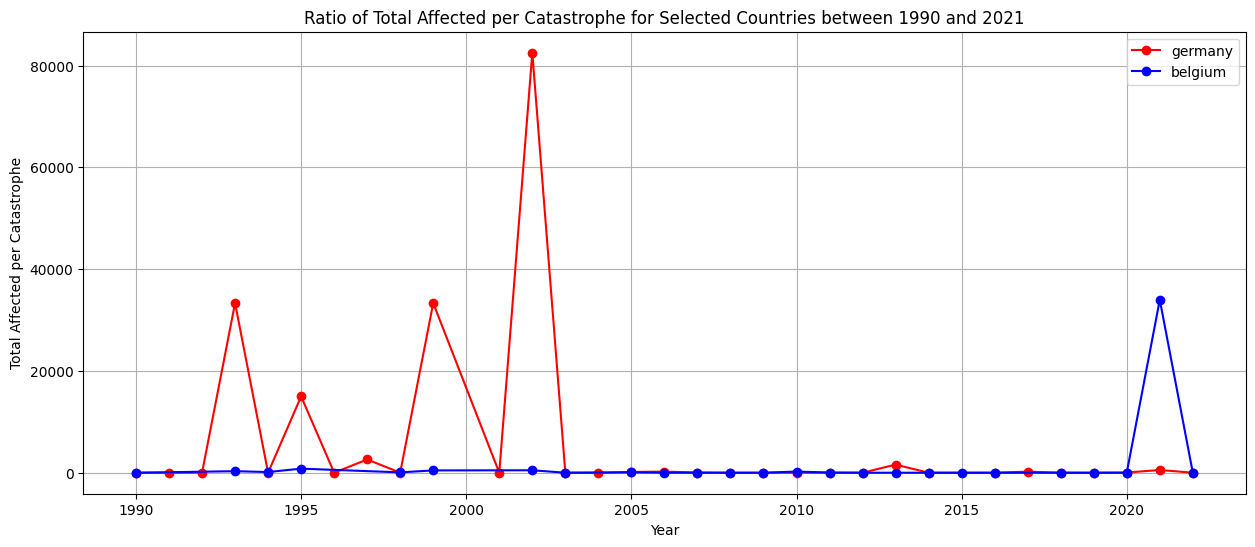

In [ ]:
ratioger_bel()

For this model, we employed a DID approach using the following formula:

$\text{PatentperCapita}_{it}$ = $\text{β}_{1}$ + $\text{β}_{2}$ $\text{AfterChock}$ + $\text{β}_{3}$ $\text{isGermany}_{i}$ + $\text{β}_{4}$ $\text{AfterChockGermany}_{i}$ + $\text{ϵ}_{i}$


Where:

* $\text{AfterChock}$ represents the dummy variable for before/after the threshold.
* $\text{isGermany}_{i}$ is the dummy variable distinguishing between both groups.
* $\text{AfterChockGermany}_{i}$ signifies the interaction between the first two dummy variables.


You can find below the graph of the DID model between Germany and Belgium.

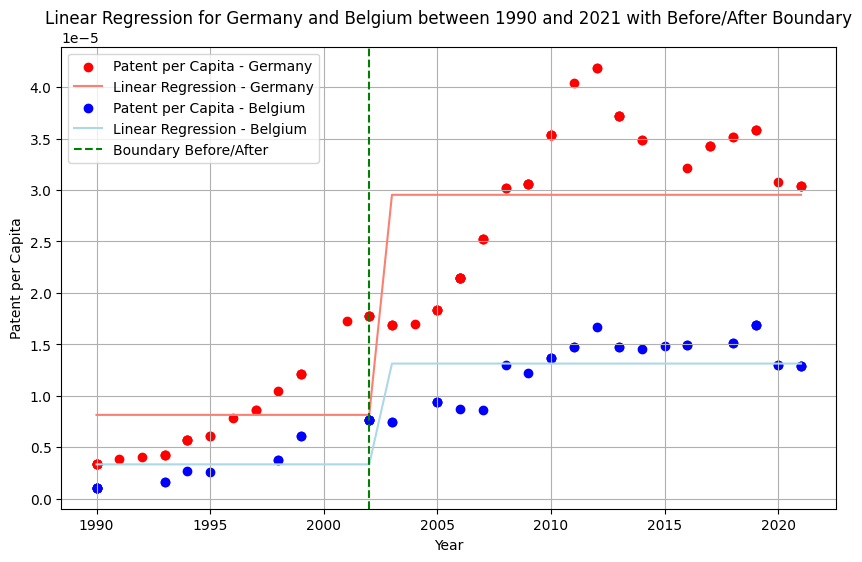

In [ ]:
difdifger_bel()

Regarding the graph, we note that both cases experienced a positive impact on patents per capita due to the threshold events. However, a more significant shift is observed in the treated group, indicating a greater impact on Germany. Let's examine the regression table results to better understand this impact. The table indicates that $\text{β}_{4}$ equals 1.159x10<sup>-5</sup> (p-value = 0.000), confirming that the 2002 shock had a positive impact on the application of green patents per capita by this amount in Germany. Simultaneously, $\text{β}_{2}$ equals 9.8x10<sup>-6</sup> (p-value = 0.000), supporting our assertion that the event positively impacted both countries but had a greater effect on Germany.

In [ ]:
HTML(r'<div class="tenor-gif-embed" data-postid="24004933" data-share-method="host" data-aspect-ratio="1.39738" data-width="25%"><a href="https://tenor.com/view/confused-face-gif-24004933">Confused Face GIF</a>from <a href="https://tenor.com/search/confused-gifs">Confused GIFs</a></div> <script type="text/javascript" async src="https://tenor.com/embed.js"></script>')


Upon revisiting the graph, we observe that following the shock, Germany faced a stagnation in patents per capita for the subsequent three years, suggesting that the treated country needed time to recover from the impact before experiencing growth in applications. However, we also notice that the growth curve started in 1995, potentially influenced by the earlier peaks observed in the ratio graph. Concerning the control group, a more consistent growth pattern is evident, affirming that even without events, there's a structural trend towards an increase in patents per capita. --> motivate with the evolution patent graph in the intro that overall increase

###Thailand and Malaysia

We will now focus on developing countries to explore potential differences. Our attention is directed towards Thailand and Malaysia for this purpose. Once again, we aim to assess countries that are similar to minimize the risk of omitted variables. However, data availability in developing countries tends to be sparse, making it challenging to find two countries with similar main aspects, sufficient patent information, and differing climate patterns. Therefore, we assume both countries to be relatively similar due to their geographical proximity and shared cultural traits. We acknowledge the differences, such as GDP per capita (Thailand in 2022 `$6,908`, Malaysia in 2022 `$11,971`), climate concern (Thailand in 2022 `67%`, Malaysia in 2022 `79%`), and secondary education (Thailand in 2022 `105%`, Malaysia in 2022 `85%`).

Observing the graph below, we notice peaks in Thailand for the years 2010 and 2012, unlike Malaysia. We will set the threshold at the highest peak in 2010, considering Thailand as the treated group and Malaysia as the control group. Building upon the structural trend of increased green patents, we could expect that setting a threshold later in subsequent years might as well influence the outcome compared to the initial DID model between Germany and Belgium.

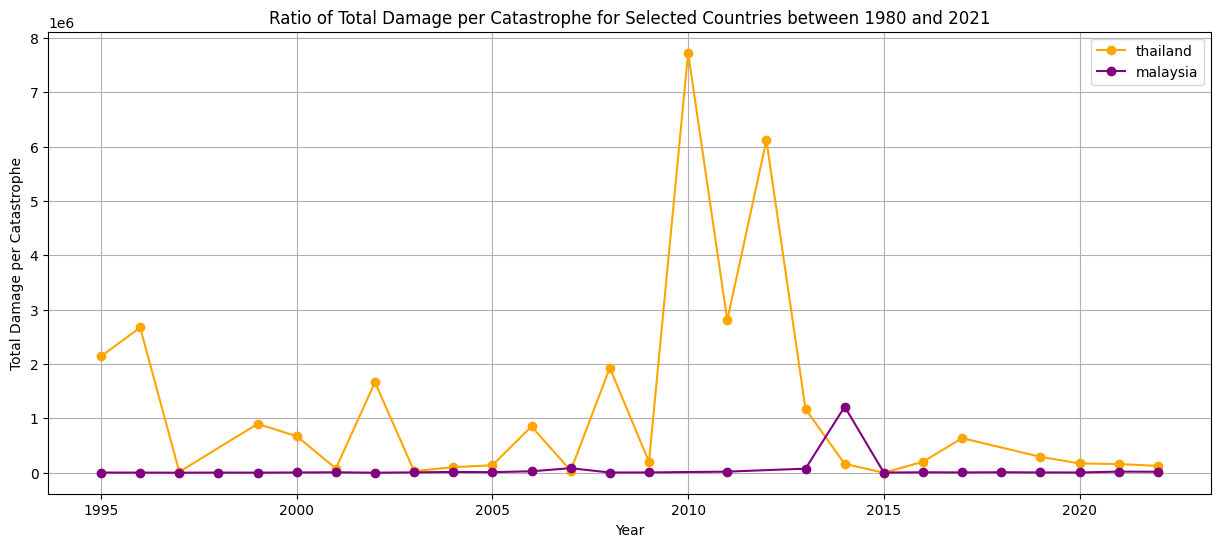

In [ ]:
ratiotha_mal()

For the second DID model, we employed a similar formula as in the first one:


$\text{PatentperCapita}_{it}$ = $\text{β}_{1}$ + $\text{β}_{2}$ $\text{AfterChock}$ + $\text{β}_{3}$ $\text{isThailand}_{i}$ + $\text{β}_{4}$ $\text{AfterChockThailand}_{i}$ + $\text{ϵ}_{i}$

Where:

* $\text{AfterChock}$ represents the dummy variable for before/after the threshold.
* $\text{isThailand}_{i}$ is the dummy variable distinguishing between both groups.
* $\text{AfterChockThailand}_{i}$ signifies the interaction between the first two dummy variables.

You can find below the graphe of the DID model between Thailand and Malaysia.

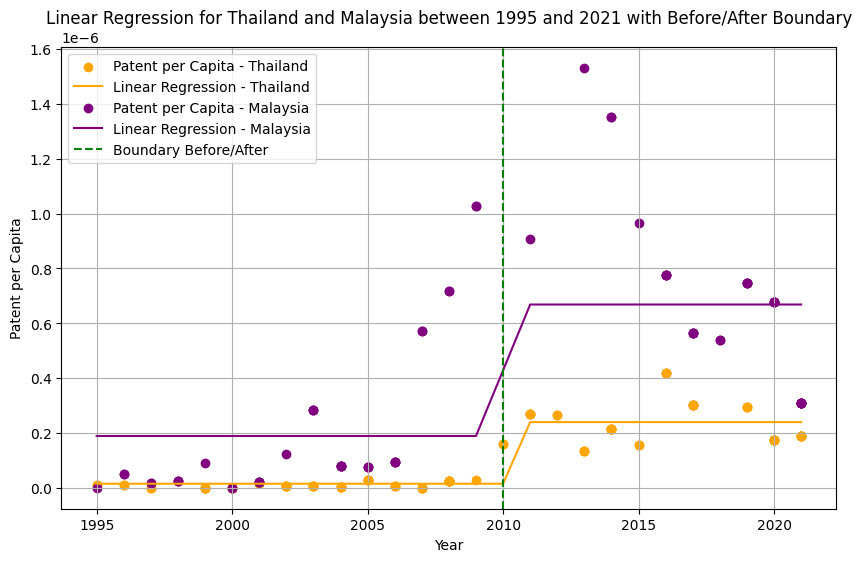

In [ ]:
difdiftha_mal()

Regarding the analysis, we started in 1995, marking the earliest available patent data for both countries. Upon reviewing the graph, we notice an increase for both countries after the threshold, with this increase being more pronounced for the control group this time. The results table confirms these observations, with $\text{β}_{4}$ amounting to -2.549x10<sup>-7</sup> (p-value = 0.000). This implies that the event had negativily impacted the treated group in terms of patent per capita compared to the control group. This result aligns with our findings in the subsequent linear model before the DID model.

Additionally, we observed a sudden surge in patent per capita in Malaysia on the graph before the threshold, followed by a return to normalcy around 2020. As the events remained consistent during this period, it suggests the potential influence of other factors causing such abrupt changes, opening further research for comprehension.

# Conclusions

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
libraries = ['numpy', 'pandas', 'seaborn', 'matplotlib', 'plotly', 'scipy', 'scikit-learn', 'statsmodels', 'linearmodels', 'stargazer', 'pycountry']

missing_libraries = [lib for lib in libraries if lib not in globals()]

if missing_libraries:
    for lib in missing_libraries:
        !pip install {lib}
else:
    print("All required libraries are already installed.")

In [ ]:
%%capture
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install plotly
%pip install scipy
%pip install scikit-learn
%pip install statsmodels
%pip install linearmodels
%pip install linearmodels.diagnostic
%pip install stargazer
%pip install pycountry

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from IPython.display import display
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from stargazer.stargazer import Stargazer
import pycountry
from IPython.display import Image, display,HTML

In [ ]:
#Import extreme weather events from EM-DAT
events = pd.read_excel("/content/drive/MyDrive/ELEPHANT/green-patents-new/public_emdat_custom_request_2023-12-12_686c6667-5546-4cc0-a4b0-6062eb8d9e93.xlsx")

In [ ]:
#Import Patent
patents = pd.read_csv("/content/drive/MyDrive/ELEPHANT/green-patents-new/PATS_IPC_13122023144148777.csv")

In [ ]:
#Import GDP per Cap
GDPCap =  pd.read_excel("/content/drive/MyDrive/ELEPHANT/green-patents-new/GDPperCAP_WB.xls")

In [ ]:
#FDI from WB 266 coountries
FDI_WB = pd.read_csv("/content/drive/MyDrive/ELEPHANT/green-patents-new/API_BX.KLT.DINV.CD.WD_DS2_en_csv_v2_5995288.csv", header = 2)

In [ ]:
#import climate worriness dataset (https://dataforgood.facebook.com/dfg/tools/climate-change-opinion-survey)
climate_worriness = pd.read_excel("/content/drive/MyDrive/ELEPHANT/green-patents-new/climate_change_opinion_survey_2022_aggregated.xlsx",sheet_name = "climate_worry")

In [ ]:
#import Education tertiary enrolmnet %
education = pd.read_csv('/content/drive/MyDrive/ELEPHANT/green-patents-new/b449f249-9a23-4840-b2cf-45c78ad26ef9_Data.csv')

In [ ]:
#import pop
population = pd.read_excel("/content/drive/MyDrive/ELEPHANT/API_SP.POP.TOTL_DS.xls")

In [ ]:
# final consumption ad % of GDP
consumption = pd.read_csv('/content/drive/MyDrive/ELEPHANT/73da1b2c-1935-485e-af2c-b0b61b733993_Data.csv')

# Data Cleaning

### Final consumption % of GDP

In [ ]:
consumption = consumption.drop(["Series Name", "Series Code"],axis=1)
consumption['Country Name'] = consumption["Country Name"].str.lower()

In [ ]:
consumption.columns = consumption.columns.str.replace(r'\s*\[YR[0-9]+\]\s*', '', regex=True)

In [ ]:
data = [['Country Name', 'Country Code', 'Year', 'consumption']]

for index, row in consumption.iterrows():
    country_name = row['Country Name']
    country_code = row['Country Code']
    for col in consumption.columns[2:]:
        year = int(col)
        secondary = row[col]
        data.append([country_name, country_code, year, secondary])

# Create a new dataframe with data restructuring
consumption = pd.DataFrame(data[1:], columns=data[0])
consumption.reset_index(drop=True, inplace=True)


In [ ]:
consumption  = consumption.rename(columns={'Country Code':'ISO',"Country Name":'Country'})
consumption['ISO'] = consumption['ISO'].str.lower().astype('string')
consumption['Country'] = consumption['Country'].str.lower().astype('string')
consumption['consumption'] = consumption['consumption'].replace('..', pd.NA)
consumption['consumption'] = pd.to_numeric(consumption['consumption'])

In [ ]:
consumption = consumption.dropna(subset='consumption')

In [ ]:
consumption

,Country,ISO,Year,consumption
0,afghanistan,afg,1960,86.776852
1,afghanistan,afg,1961,87.044526
2,afghanistan,afg,1962,85.365850
3,afghanistan,afg,1963,93.491117
4,afghanistan,afg,1964,95.277767
...,...,...,...,...
13666,zimbabwe,zwe,2018,88.074018
13667,zimbabwe,zwe,2019,86.888296
13668,zimbabwe,zwe,2020,89.581158
13669,zimbabwe,zwe,2021,89.789589


### Patents

In [ ]:
#Cleaning could add on the top
patents_new = patents[["Country", "Value", "Time","Technology domains & IPC", "LOCATION",'KINDPATENT']].rename(columns={"Value":"Patents number",'LOCATION':'ISO'})
patents_new = patents_new[(patents_new['Technology domains & IPC'] == "Environment") & (patents_new['KINDPATENT'] == 'PCT_A')]

patents_new = patents_new.drop(['Technology domains & IPC', 'KINDPATENT'], axis=1)

# Convert 'country' column to lowercase
patents_new['Country'] = patents_new['Country'].str.lower()
patents_new['ISO'] = patents_new['ISO'].str.lower()
patents_new = patents_new.rename(columns={"Time": "Year"})

patents_new

,Country,Patents number,Year,ISO
59036,belarus,0.0000,1977,blr
59037,belarus,0.0000,1978,blr
59038,belarus,0.0000,1979,blr
59039,belarus,0.0000,1980,blr
59040,belarus,0.0000,1981,blr
...,...,...,...,...
63566,united arab emirates,11.5000,2017,are
63567,united arab emirates,12.0000,2018,are
63568,united arab emirates,6.7500,2019,are
63569,united arab emirates,15.0000,2020,are


In [ ]:
patents_new['Patents number'].describe()

count    4535.000000
mean      106.555929
std       564.395965
min         0.000000
25%         0.000000
50%         1.000000
75%        13.000000
max      7607.100000
Name: Patents number, dtype: float64

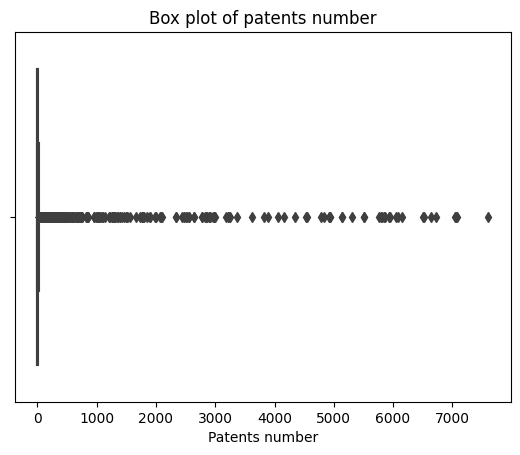

In [ ]:
sns.boxplot(x=patents_new['Patents number'])
plt.title('Box plot of patents number')
plt.show()

### Catastrophy

In [ ]:
catastrophy = events[["Country","ISO", "Disaster Type", 'Start Year','Total Deaths',"Total Affected", "Total Damage, Adjusted ('000 US$)"]]
catastrophy.head(20)

,Country,ISO,Disaster Type,Start Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,Benin,BEN,Drought,1972,NaN,115000.0,NaN
1,Cabo Verde,CPV,Drought,1972,NaN,NaN,NaN
2,Gambia,GMB,Drought,1971,NaN,150000.0,1446.0
3,Guinea-Bissau,GNB,Drought,1972,NaN,NaN,NaN
4,Morocco,MAR,Flood,1970,11.0,266444.0,226134.0
5,Peru,PER,Flood,1970,3.0,136050.0,39197.0
6,Niger,NER,Epidemic,1970,319.0,2677.0,NaN
7,Philippines,PHL,Earthquake,1970,14.0,200.0,NaN
8,Cyprus,CYP,Epidemic,1970,NaN,NaN,NaN
9,Ethiopia,ETH,Epidemic,1970,500.0,4000.0,NaN


In [ ]:
#control all the value in Disaster Type
unique_disaster_types = catastrophy['Disaster Type'].unique()
print(unique_disaster_types)

['Drought' 'Flood' 'Epidemic' 'Earthquake' 'Fire (Miscellaneous)'
 'Mass movement (wet)' 'Storm' 'Explosion (Miscellaneous)' 'Wildfire'
 'Industrial accident (General)' 'Rail' 'Water' 'Collapse (Miscellaneous)'
 'Air' 'Miscellaneous accident (General)' 'Explosion (Industrial)'
 'Volcanic activity' 'Extreme temperature' 'Poisoning' 'Fire (Industrial)'
 'Gas leak' 'Road' 'Infestation' 'Chemical spill' 'Collapse (Industrial)'
 'Oil spill' 'Radiation' 'Mass movement (dry)' 'Impact' 'Animal incident'
 'Glacial lake outburst flood']


In [ ]:
catastrophy = catastrophy.rename(columns={'Start Year': 'Year', 'Country Code':'ISO'})
catastrophy['ISO'] = catastrophy['ISO'].str.lower().astype('string')
catastrophy['Country'] = catastrophy['Country'].str.lower().astype('string')
catastrophy['Disaster Type'] = catastrophy['Disaster Type'].str.lower().astype('string')

In [ ]:
catastrophy

,Country,ISO,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,benin,ben,drought,1972,NaN,115000.0,NaN
1,cabo verde,cpv,drought,1972,NaN,NaN,NaN
2,gambia,gmb,drought,1971,NaN,150000.0,1446.0
3,guinea-bissau,gnb,drought,1972,NaN,NaN,NaN
4,morocco,mar,flood,1970,11.0,266444.0,226134.0
...,...,...,...,...,...,...,...
24381,honduras,hnd,drought,2023,NaN,10300.0,NaN
24382,spain,esp,drought,2023,NaN,NaN,NaN
24383,indonesia,idn,drought,2023,NaN,18750000.0,NaN
24384,uruguay,ury,drought,2023,NaN,409115.0,NaN


In [ ]:
catastrophy_new = catastrophy.groupby(['Country', 'ISO', 'Year']).agg({
    'Total Deaths': 'sum',
    'Total Affected': 'sum',
    'Total Damage, Adjusted (\'000 US$)': 'sum'
}).reset_index()

catastrophy_new

,Country,ISO,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,afghanistan,afg,1971,100.0,0.0,0.0
1,afghanistan,afg,1972,161.0,250015.0,0.0
2,afghanistan,afg,1976,101.0,170000.0,0.0
3,afghanistan,afg,1978,120.0,271684.0,233286.0
4,afghanistan,afg,1980,0.0,30000.0,0.0
...,...,...,...,...,...,...
5961,zimbabwe,zwe,2018,101.0,5164.0,0.0
5962,zimbabwe,zwe,2019,719.0,270186.0,0.0
5963,zimbabwe,zwe,2021,3.0,169900.0,0.0
5964,zimbabwe,zwe,2022,785.0,9622.0,0.0


### FDI - Foreign Direct Investment, net inflows from WB


In [ ]:
FDI_WB

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.506181e+08,-2.877586e+07,2.755127e+07,1.624636e+08,1.359212e+08,-7.522654e+07,1.610670e+08,1.335451e+08,2.481503e+08,NaN
1,Africa Eastern and Southern,AFE,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.768142e+10,2.877423e+10,1.666027e+10,1.010829e+10,1.358898e+10,1.486866e+10,1.285669e+10,5.279721e+10,1.807836e+10,NaN
2,Afghanistan,AFG,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.340455e+07,1.297015e+07,2.060098e+07,NaN,NaN
3,Africa Western and Central,AFW,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.659803e+10,1.564317e+10,1.393704e+10,1.766242e+10,1.549284e+10,1.245274e+10,1.075330e+10,1.735395e+10,1.258155e+10,NaN
4,Angola,AGO,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.657515e+09,1.002822e+10,-1.795176e+08,-7.397295e+09,-6.456076e+09,-4.098479e+09,-1.866468e+09,-4.355117e+09,-6.598653e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.998884e+08,3.433506e+08,2.437871e+08,2.868352e+08,3.185430e+08,2.850816e+08,3.946253e+08,5.009279e+08,8.114684e+08,NaN
262,"Yemen, Rep.",YEM,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.331047e+08,-1.544481e+07,-5.610000e+08,-2.698500e+08,-2.820983e+08,-3.709828e+08,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.791659e+09,1.521140e+09,2.215307e+09,2.058580e+09,5.569462e+09,5.116098e+09,3.153553e+09,4.065879e+10,9.194808e+09,NaN
264,Zambia,ZMB,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.507800e+09,1.582667e+09,6.628139e+08,1.107520e+09,4.084385e+08,5.479679e+08,2.452055e+08,-2.714361e+08,1.080941e+07,NaN


In [ ]:
FDI_WB = FDI_WB.drop(["Indicator Name", "Indicator Code","Unnamed: 67"],axis=1)
FDI_WB['Country Name'] = FDI_WB["Country Name"].str.lower()

In [ ]:
selected_columns = [FDI_WB.columns[0]] + [FDI_WB.columns[1]] + [col for col in FDI_WB.columns[2:] if int(col) > 1970]

FDI = FDI_WB[selected_columns]

In [ ]:
data = [['Country Name', 'Country Code', 'Year', 'FDI']]

for index, row in FDI.iterrows():
    country_name = row['Country Name']
    country_code = row['Country Code']
    for col in FDI.columns[2:]:
        year = int(col)
        fdi_value = row[col]
        data.append([country_name, country_code, year, fdi_value])

# Create a new dataframe with data restructuring
fdi = pd.DataFrame(data[1:], columns=data[0])
fdi.reset_index(drop=True, inplace=True)


In [ ]:
fdi = fdi.rename(columns={'Country Code': 'ISO', 'Country Name':'Country'})
fdi['ISO'] = fdi['ISO'].str.lower().astype('string')

In [ ]:
fdi

,Country,ISO,Year,FDI
0,aruba,abw,1971,NaN
1,aruba,abw,1972,NaN
2,aruba,abw,1973,NaN
3,aruba,abw,1974,NaN
4,aruba,abw,1975,NaN
...,...,...,...,...
13827,zimbabwe,zwe,2018,7.178653e+08
13828,zimbabwe,zwe,2019,2.495000e+08
13829,zimbabwe,zwe,2020,1.503600e+08
13830,zimbabwe,zwe,2021,2.500000e+08


### Cleaning the Government index dataset


In [ ]:
government = government.drop(["Series Code"],axis=1)
government.rename(columns={col: col.split()[0] for col in government.columns if '[YR' in col}, inplace=True)


In [ ]:
reframed_government = pd.melt(
    government,
    id_vars=['Country Name', 'Country Code', 'Series Name'],
    var_name='Year',
    value_name='Value'
)

reframed_government = reframed_government.rename(columns={'Country Code':'ISO', 'Country Name':'Country'})
reframed_government = reframed_government[reframed_government['Series Name'].str.contains('control of corruption: estimate', case=False) & reframed_government['Series Name'].notna()]
reframed_government = reframed_government[reframed_government['Series Name'] != '<NA>']
reframed_government['ISO'] = reframed_government['ISO'].str.lower().astype('string')
reframed_government['Country'] = reframed_government['Country'].str.lower().astype('string')
reframed_government['Series Name'] = reframed_government['Series Name'].str.lower().astype('string')
reframed_government['Year'] = reframed_government['Year'].astype('int')
reframed_government['Value'] = pd.to_numeric(reframed_government['Value'],errors = 'coerce')


In [ ]:
reframed_government

,Country,ISO,Series Name,Year,Value
0,afghanistan,afg,control of corruption: estimate,1996,-1.291705
25,albania,alb,control of corruption: estimate,1996,-0.893903
50,algeria,dza,control of corruption: estimate,1996,-0.566741
75,american samoa,asm,control of corruption: estimate,1996,NaN
100,andorra,and,control of corruption: estimate,1996,1.318143
...,...,...,...,...,...
128390,virgin islands (u.s.),vir,control of corruption: estimate,2022,-0.005950
128415,west bank and gaza,pse,control of corruption: estimate,2022,-0.702682
128440,"yemen, rep.",yem,control of corruption: estimate,2022,-1.679558
128465,zambia,zmb,control of corruption: estimate,2022,-0.529200


### Climate worriness

In [ ]:
climate_worriness = climate_worriness.transpose()
climate_worriness.columns = climate_worriness.iloc[0]
climate_worriness = climate_worriness.iloc[1:]

In [ ]:
climate_worriness

climate_worry,Very worried,Somewhat worried,Not very worried,Not at all worried,Refused,(Unweighted Base)
Albania,41.842366,39.837751,9.840718,6.034527,2.444638,329.0
Algeria,34.574832,31.352787,14.549988,16.932467,2.589926,1066.0
Angola,54.723818,19.441686,14.933694,7.291281,3.609521,727.0
Argentina,50.378295,34.216395,9.100259,5.244613,1.060438,1257.0
Armenia,35.560722,37.144316,16.890086,10.260444,0.144432,306.0
...,...,...,...,...,...,...
Uruguay,50.090761,35.070081,9.097307,4.684442,1.057408,580.0
Uzbekistan,37.386223,41.172126,14.324256,6.493777,0.623618,710.0
Vietnam,40.00403,45.190011,9.954357,3.237201,1.614402,1096.0
Yemen,7.325754,24.378207,26.250941,40.861359,1.183739,731.0


In [ ]:
climate_worriness['Country'] = climate_worriness.index
climate_worriness['Country'] = climate_worriness['Country'].str.lower()
climate_worriness['Worriness'] = climate_worriness['Very worried'] + climate_worriness['Somewhat worried']
climate_worriness.reset_index(drop= True, inplace=True)
climate_worriness = climate_worriness[['Country',"Worriness"]]
climate_worriness.rename_axis('', axis=1, inplace=True)
climate_worriness.loc[:, 'Country'] = climate_worriness['Country'].astype('string')
climate_worriness.loc[:, 'Worriness'] = climate_worriness['Worriness'].astype('float64')

<ipython-input-51-078ac9b07734>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_worriness.loc[:, 'Country'] = climate_worriness['Country'].astype('string')
<ipython-input-51-078ac9b07734>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  climate_worriness.loc[:, 'Country'] = climate_worriness['Country'].astype('string')
<ipython-input-51-078ac9b07734>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
def get_iso3(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return None


In [ ]:
climate_worriness['ISO'] = climate_worriness['Country'].apply(get_iso3).str.lower()
climate_worriness['ISO'] = climate_worriness['ISO'].astype('string')

<ipython-input-56-2b766a0bcecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_worriness['ISO'] = climate_worriness['Country'].apply(get_iso3).str.lower()
<ipython-input-56-2b766a0bcecf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_worriness['ISO'] = climate_worriness['ISO'].astype('string')


In [ ]:
climate_worriness

,Country,Worriness,ISO
0,albania,81.680117,alb
1,algeria,65.927619,dza
2,angola,74.165504,ago
3,argentina,84.594690,arg
4,armenia,72.705038,arm
...,...,...,...
105,uruguay,85.160842,ury
106,uzbekistan,78.558349,uzb
107,vietnam,85.194041,<NA>
108,yemen,31.703961,yem


### Education

In [ ]:
education = education.drop(["Series Name", "Series Code"],axis=1)
education['Country Name'] = education["Country Name"].str.lower()

In [ ]:
education.columns = education.columns.str.replace(r'\s*\[YR[0-9]+\]\s*', '', regex=True)

In [ ]:
data = [['Country Name', 'Country Code', 'Year', 'Tertiary']]

for index, row in education.iterrows():
    country_name = row['Country Name']
    country_code = row['Country Code']
    for col in education.columns[2:]:
        year = int(col)
        tertiary = row[col]
        data.append([country_name, country_code, year, tertiary])

# Create a new dataframe with data restructuring
education = pd.DataFrame(data[1:], columns=data[0])
education.reset_index(drop=True, inplace=True)


In [ ]:
education = education.rename(columns={'Country Code':'ISO',"Country Name":'Country'})
education['ISO'] = education['ISO'].str.lower().astype('string')
education['Tertiary'] = education['Tertiary'].replace('..', pd.NA)
education['Tertiary'] = pd.to_numeric(education['Tertiary'])
education['Country'] = education['Country'].astype('string')

In [ ]:
education = education.dropna(subset=['Country','ISO'])

In [ ]:
education

,Country,ISO,Year,Tertiary
0,afghanistan,afg,2022,NaN
1,afghanistan,afg,2021,NaN
2,afghanistan,afg,2020,10.85844
3,afghanistan,afg,2019,NaN
4,afghanistan,afg,2018,9.96379
...,...,...,...,...
16753,world,wld,1964,NaN
16754,world,wld,1963,NaN
16755,world,wld,1962,NaN
16756,world,wld,1961,NaN


##Population

In [ ]:
#Cleaning Pop DS
population.columns = GDPCap.iloc[2]  #define the line 3 as name of the column
population = population.iloc[3:]

population

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
5,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
6,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
7,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
265,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
266,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
267,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [ ]:
#Get rid of useless columns and convert in small letters
pop = population.drop(columns=['Indicator Name', 'Indicator Code'])
pop.rename(columns={'Country Name': 'Country',"Country Code":'ISO'}, inplace=True)
pop['ISO'] = pop['ISO'].str.lower()
pop['Country'] = pop['Country'].str.lower()

pop

2,Country,ISO,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,aruba,abw,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
4,africa eastern and southern,afe,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
5,afghanistan,afg,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
6,africa western and central,afw,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
7,angola,ago,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,kosovo,xkx,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
265,"yemen, rep.",yem,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
266,south africa,zaf,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
267,zambia,zmb,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [ ]:
# Data Restructuration to have in one the years
data = [['Country','ISO', 'Year', 'Population']]

for index, row in pop.iterrows():
    pays = row['Country']
    iso = row['ISO']
    for col in pop.columns[2:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays,iso, annee, valeur])

# Create new dataframe with data Restructuration
pop = pd.DataFrame(data[1:], columns=data[0])

# reset index to columns
pop.reset_index(drop=True, inplace=True)

In [ ]:
pop['ISO'] = pop['ISO'].astype('string')
pop['Country'] = pop['Country'].astype('string')

In [ ]:
pop

,Country,ISO,Year,Population
0,aruba,abw,1960,54608.0
1,aruba,abw,1961,55811.0
2,aruba,abw,1962,56682.0
3,aruba,abw,1963,57475.0
4,aruba,abw,1964,58178.0
...,...,...,...,...
16753,zimbabwe,zwe,2018,15052184.0
16754,zimbabwe,zwe,2019,15354608.0
16755,zimbabwe,zwe,2020,15669666.0
16756,zimbabwe,zwe,2021,15993524.0


##GDP

In [ ]:
#Cleaning GDP DS
GDPCap.columns = GDPCap.iloc[2]  #define the line 3 as name of the column
GDPC = GDPCap.iloc[3:]

GDPC

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
5,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
6,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
7,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
265,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
266,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
267,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [ ]:
#Get rid of useless columns and convert in small letters
GDPC = GDPC.drop(columns=['Indicator Name', 'Indicator Code'])
GDPC = GDPC.rename(columns={'Country Name': 'Country','Country Code':'ISO'})
GDPC['Country'] = GDPC['Country'].str.lower()

GDPC

2,Country,ISO,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
4,africa eastern and southern,AFE,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
5,afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
6,africa western and central,AFW,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,128.049650,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
7,angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
265,"yemen, rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
266,south africa,ZAF,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
267,zambia,ZMB,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [ ]:
# Data Restructuration to have in one the years
data = [['Country','ISO', 'Year', 'GDP']]

for index, row in GDPC.iterrows():
    pays = row['Country']
    iso = row['ISO']
    for col in GDPC.columns[2:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays,iso, annee, valeur])


# Create new dataframe with data Restructuration
gdp = pd.DataFrame(data[1:], columns=data[0])
gdp['ISO'] = gdp['ISO'].str.lower()
# reset index to columns
gdp.reset_index(drop=True, inplace=True)

# Check the modified dataframe

gdp

,Country,ISO,Year,GDP
0,aruba,abw,1960,NaN
1,aruba,abw,1961,NaN
2,aruba,abw,1962,NaN
3,aruba,abw,1963,NaN
4,aruba,abw,1964,NaN
...,...,...,...,...
16753,zimbabwe,zwe,2018,2269.177012
16754,zimbabwe,zwe,2019,1421.868596
16755,zimbabwe,zwe,2020,1372.696674
16756,zimbabwe,zwe,2021,1773.920411


In [ ]:
gdp['ISO'] = gdp['ISO'].astype('string')
gdp['Country'] = gdp['Country'].astype('string')

In [ ]:
gdp

,Country,ISO,Year,GDP
0,aruba,abw,1960,NaN
1,aruba,abw,1961,NaN
2,aruba,abw,1962,NaN
3,aruba,abw,1963,NaN
4,aruba,abw,1964,NaN
...,...,...,...,...
16753,zimbabwe,zwe,2018,2269.177012
16754,zimbabwe,zwe,2019,1421.868596
16755,zimbabwe,zwe,2020,1372.696674
16756,zimbabwe,zwe,2021,1773.920411


# MERGED using the sum of all events per year

In [ ]:
def merge_datasets(df1, df2):
    df2 = df2.rename(columns={'Country': 'Country_y'})
    merged_df = pd.merge(df1, df2, on=['ISO', 'Year'], how='left')
    merged_df = merged_df.drop(['Country_y'], axis=1)

    return merged_df

In [ ]:
merged_sum = merge_datasets(patents_new, catastrophy_new)

In [ ]:
merged_final = merge_datasets(merged_sum,education)

In [ ]:
merged_final = merge_datasets(merged_final,gdp)

In [ ]:
merged_final = merge_datasets(merged_final,pop)

In [ ]:
merged_final = merge_datasets(merged_final,fdi)

In [ ]:
merged_final = merge_datasets(merged_final,consumption)

In [ ]:
merged_final = merged_final.rename(columns={'Patents number':'patents_number','Total Affected':'total_affected','Total Damage, Adjusted (\'000 US$)':'total_damage'})

In [ ]:
merged_final = merged_final.dropna() # 1977 - 2021 and 101 countries

#Dif in Dif

##catastrophy

In [ ]:
#Vue catastrophy
catastrophy

,Country,ISO,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,benin,ben,drought,1972,NaN,115000.0,NaN
1,cabo verde,cpv,drought,1972,NaN,NaN,NaN
2,gambia,gmb,drought,1971,NaN,150000.0,1446.0
3,guinea-bissau,gnb,drought,1972,NaN,NaN,NaN
4,morocco,mar,flood,1970,11.0,266444.0,226134.0
...,...,...,...,...,...,...,...
24381,honduras,hnd,drought,2023,NaN,10300.0,NaN
24382,spain,esp,drought,2023,NaN,NaN,NaN
24383,indonesia,idn,drought,2023,NaN,18750000.0,NaN
24384,uruguay,ury,drought,2023,NaN,409115.0,NaN


In [ ]:
#keep only catasttrophy human based
catakeep = ['drought', 'flood', 'extreme temperature', 'storm', 'wildfire', 'glacial lake outburst flood']
cata = catastrophy[catastrophy['Disaster Type'].isin(catakeep)]
cata

,Country,ISO,Disaster Type,Year,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,benin,ben,drought,1972,NaN,115000.0,NaN
1,cabo verde,cpv,drought,1972,NaN,NaN,NaN
2,gambia,gmb,drought,1971,NaN,150000.0,1446.0
3,guinea-bissau,gnb,drought,1972,NaN,NaN,NaN
4,morocco,mar,flood,1970,11.0,266444.0,226134.0
...,...,...,...,...,...,...,...
24381,honduras,hnd,drought,2023,NaN,10300.0,NaN
24382,spain,esp,drought,2023,NaN,NaN,NaN
24383,indonesia,idn,drought,2023,NaN,18750000.0,NaN
24384,uruguay,ury,drought,2023,NaN,409115.0,NaN


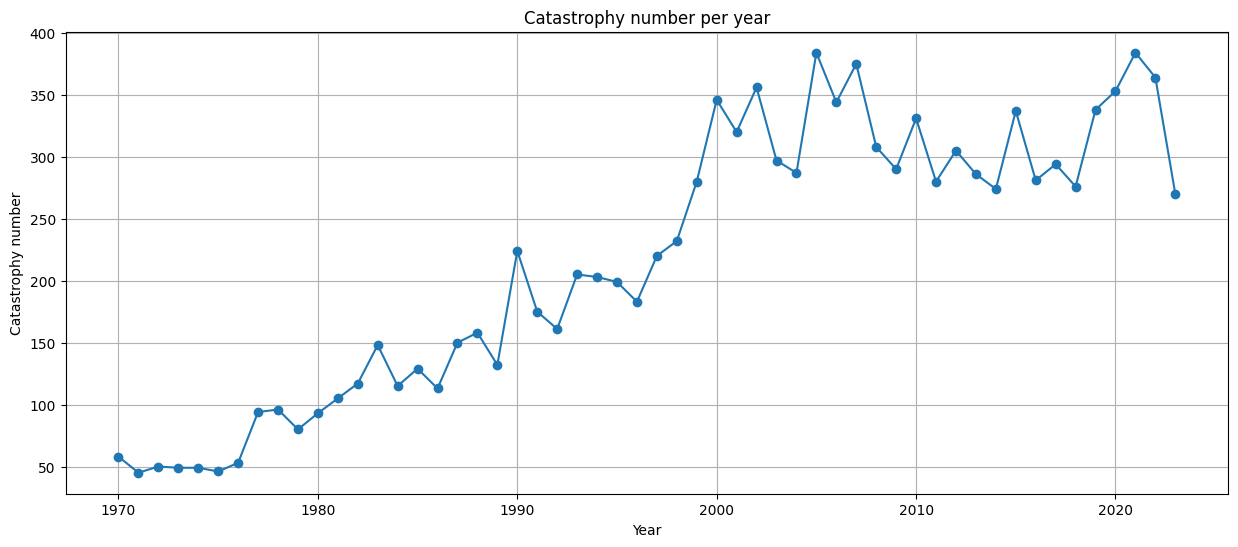

In [ ]:
#visualise the global trend on number
catastrophes_per_year = cata['Year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
plt.plot(catastrophes_per_year.index, catastrophes_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Catastrophy number')
plt.title('Catastrophy number per year')
plt.grid(True)
plt.show()

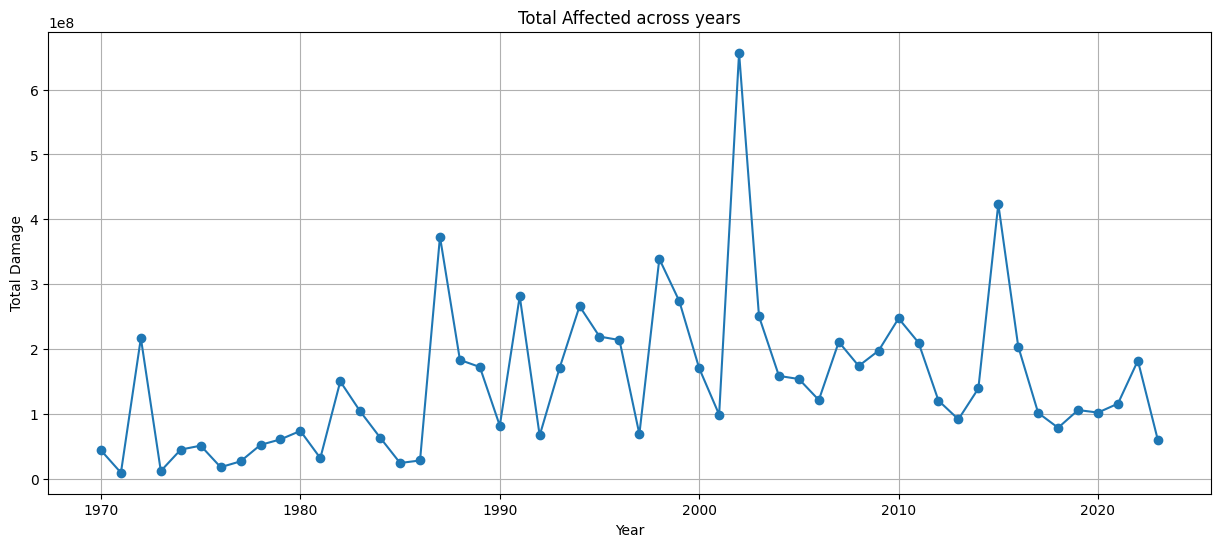

In [ ]:
#visualise the global trend on affected
damage_per_year = cata.groupby('Year')["Total Affected"].sum()

plt.figure(figsize=(15, 6))
plt.plot(damage_per_year.index, damage_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Damage')
plt.title('Total Affected across years')
plt.grid(True)
plt.show()

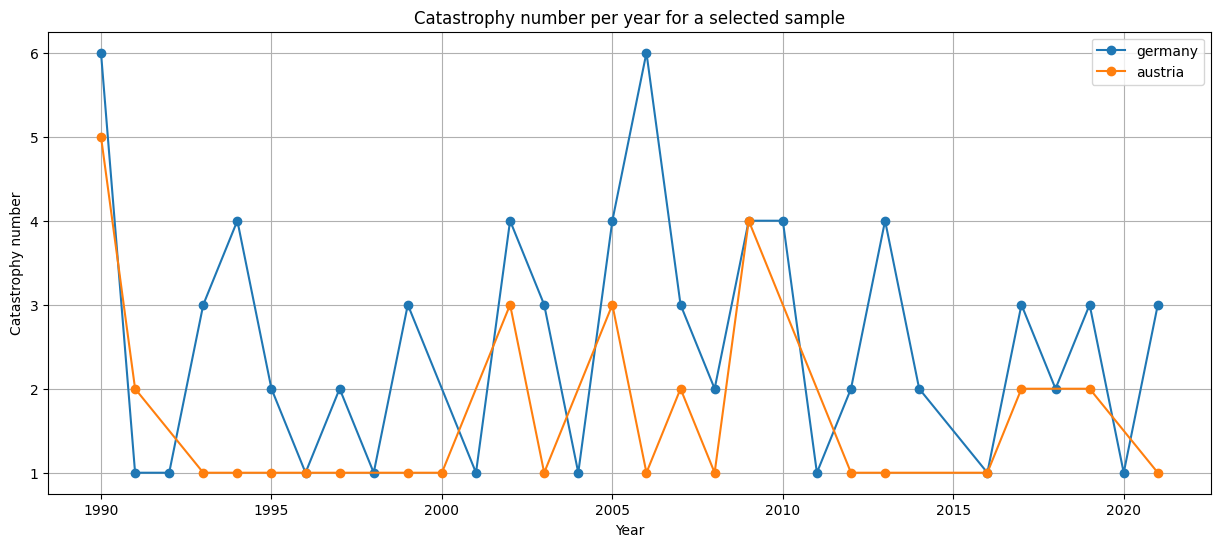

In [ ]:
#visualize for Gemrany and Austria
sample = ['germany', 'austria']

plt.figure(figsize=(15, 6))
for pays in sample:
    data_selected = cata[(cata['Country'] == pays) & (cata['Year'].between(1990, 2021))]
    catastrophes_per_year = data_selected['Year'].value_counts().sort_index()
    plt.plot(catastrophes_per_year.index, catastrophes_per_year.values, marker='o', linestyle='-', label=pays)

plt.xlabel('Year')
plt.ylabel('Catastrophy number')
plt.title('Catastrophy number per year for a selected sample')
plt.legend()
plt.grid(True)
plt.show()

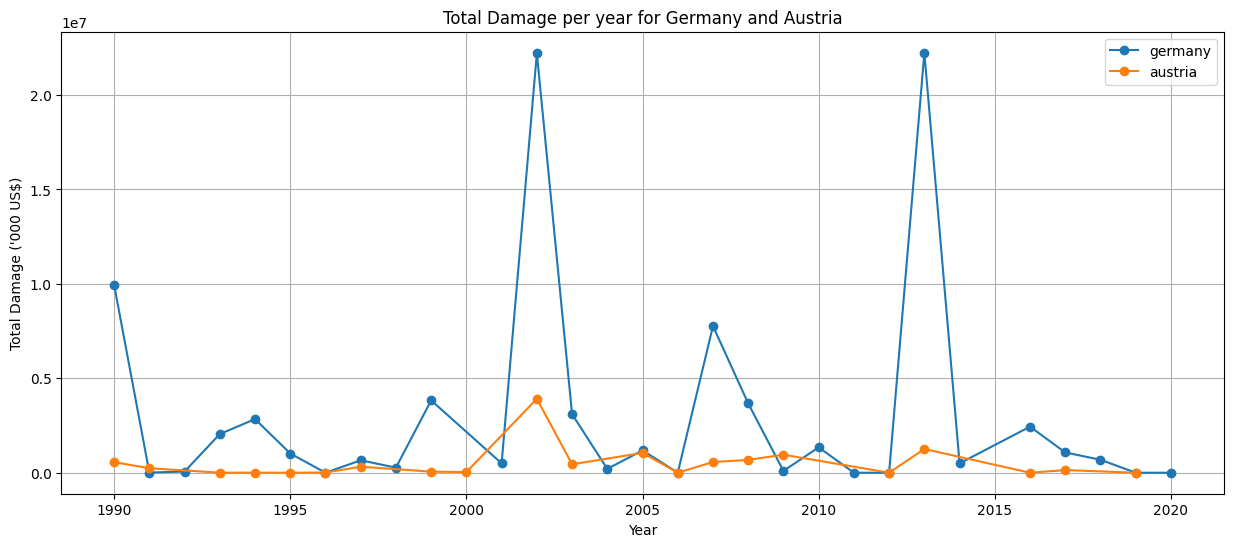

In [ ]:
#visualize for Gemrany and Austria
sample = ['germany', 'austria']

plt.figure(figsize=(15, 6))
for country in sample:
    data_selected = cata[(cata['Country'] == country) & (cata['Year'].between(1990, 2020))]
    damage_per_year = data_selected.groupby('Year')['Total Damage, Adjusted (\'000 US$)'].sum()
    plt.plot(damage_per_year.index, damage_per_year.values, marker='o', linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Total Damage (\'000 US$)')
plt.title('Total Damage per year for Germany and Austria')
plt.legend()
plt.grid(True)
plt.show()

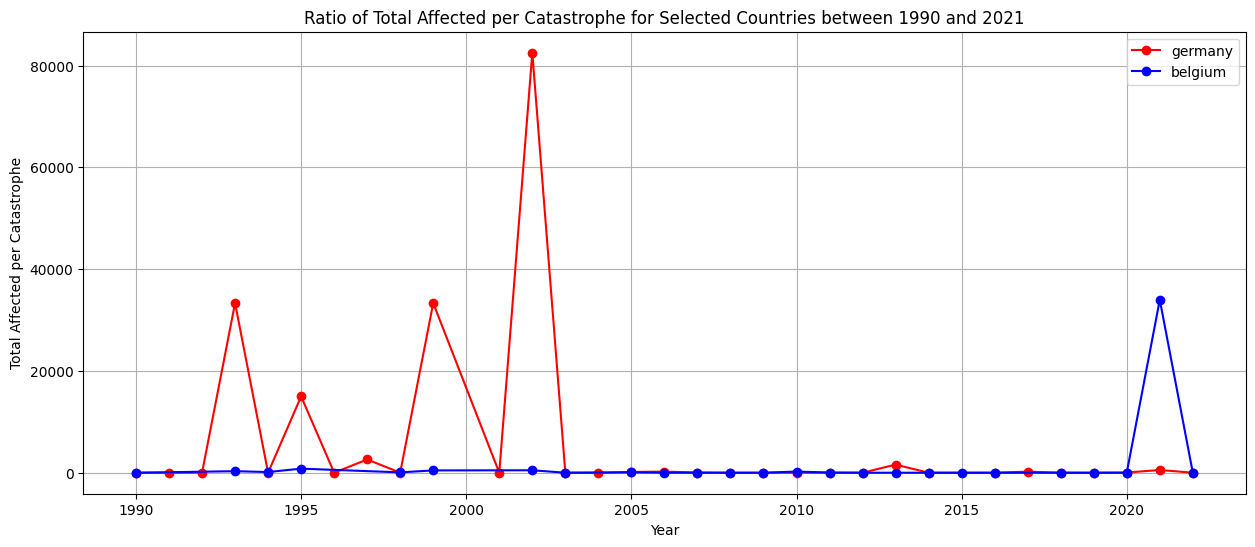

In [ ]:
def ratioger_bel():
    sample = ['germany', 'belgium']

    plt.figure(figsize=(15, 6))
    for pays in sample:
        data_selected = cata[(cata['Country'] == pays) & (cata['Year'].between(1990, 2022))]
        catastrophes_per_year = data_selected['Year'].value_counts().sort_index()
        damage_per_year = data_selected.groupby('Year')["Total Affected"].sum().fillna(0)

        ratio = damage_per_year / catastrophes_per_year

        if pays == 'germany':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='red')
        elif pays == 'belgium':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='blue')

    plt.xlabel('Year')
    plt.ylabel('Total Affected per Catastrophe')
    plt.title('Ratio of Total Affected per Catastrophe for Selected Countries between 1990 and 2021')
    plt.legend()
    plt.grid(True)
    plt.show()

ratioger_bel()

##Patents

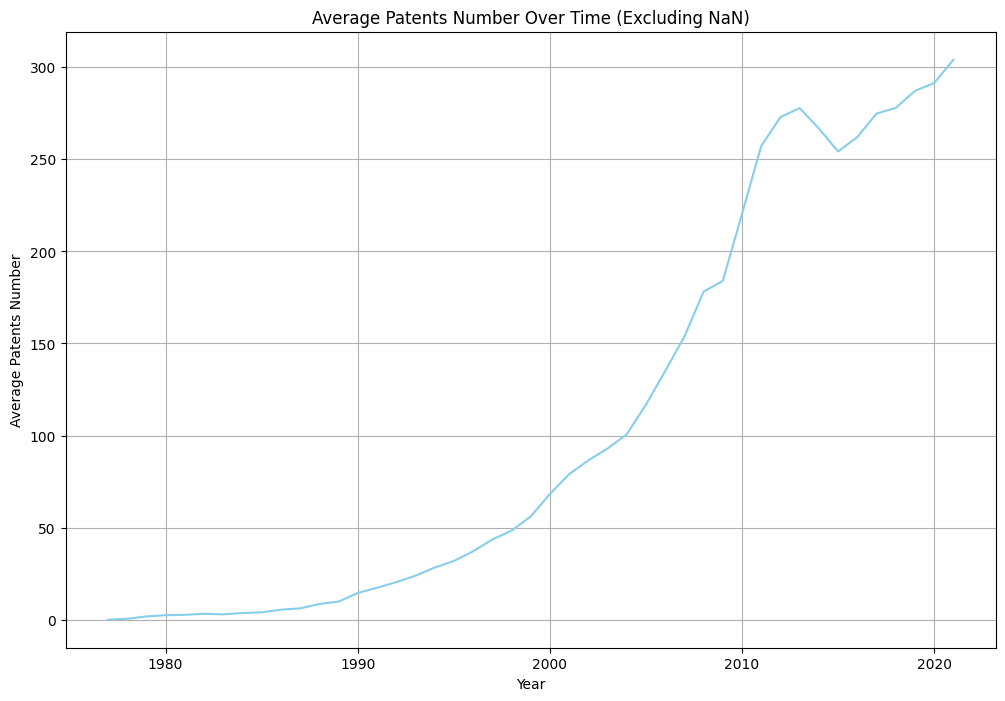

In [ ]:
avg_patents_by_year =patents_new.groupby('Year')['Patents number'].mean().reset_index().dropna()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot line chart
plt.plot(avg_patents_by_year['Year'], avg_patents_by_year['Patents number'], linestyle='-', color='skyblue')

plt.title('Average Patents Number Over Time (Excluding NaN)')
plt.xlabel('Year')
plt.ylabel('Average Patents Number')
plt.grid(True)  # Add grid for better readability
plt.show()

In [ ]:
#Merge with gdp and pop for "per capita"
ds = pd.merge(patents_new, gdp, on=['ISO', 'Year'], how='inner')
ds = pd.merge(ds, pop, on=['ISO', 'Year'], how='inner')
ds['Patent per Capita'] = ds['Patents number'] / ds['Population']
ds = ds.drop('Country_y', axis=1)
ds.drop(ds.columns[5], axis=1, inplace=True)
ds.rename(columns={'Country_x': 'Country'}, inplace=True)
ds

,Country,Patents number,Year,ISO,GDP,Population,Patent per Capita
0,belarus,0.0000,1977,blr,NaN,9463000.0,0.000000e+00
1,belarus,0.0000,1978,blr,NaN,9525000.0,0.000000e+00
2,belarus,0.0000,1979,blr,NaN,9584000.0,0.000000e+00
3,belarus,0.0000,1980,blr,NaN,9643000.0,0.000000e+00
4,belarus,0.0000,1981,blr,NaN,9710000.0,0.000000e+00
...,...,...,...,...,...,...,...
4440,united arab emirates,11.5000,2017,are,43063.967479,9068296.0,1.268154e-06
4441,united arab emirates,12.0000,2018,are,46722.268719,9140169.0,1.312886e-06
4442,united arab emirates,6.7500,2019,are,45376.170839,9211657.0,7.327672e-07
4443,united arab emirates,15.0000,2020,are,37629.174168,9287289.0,1.615111e-06


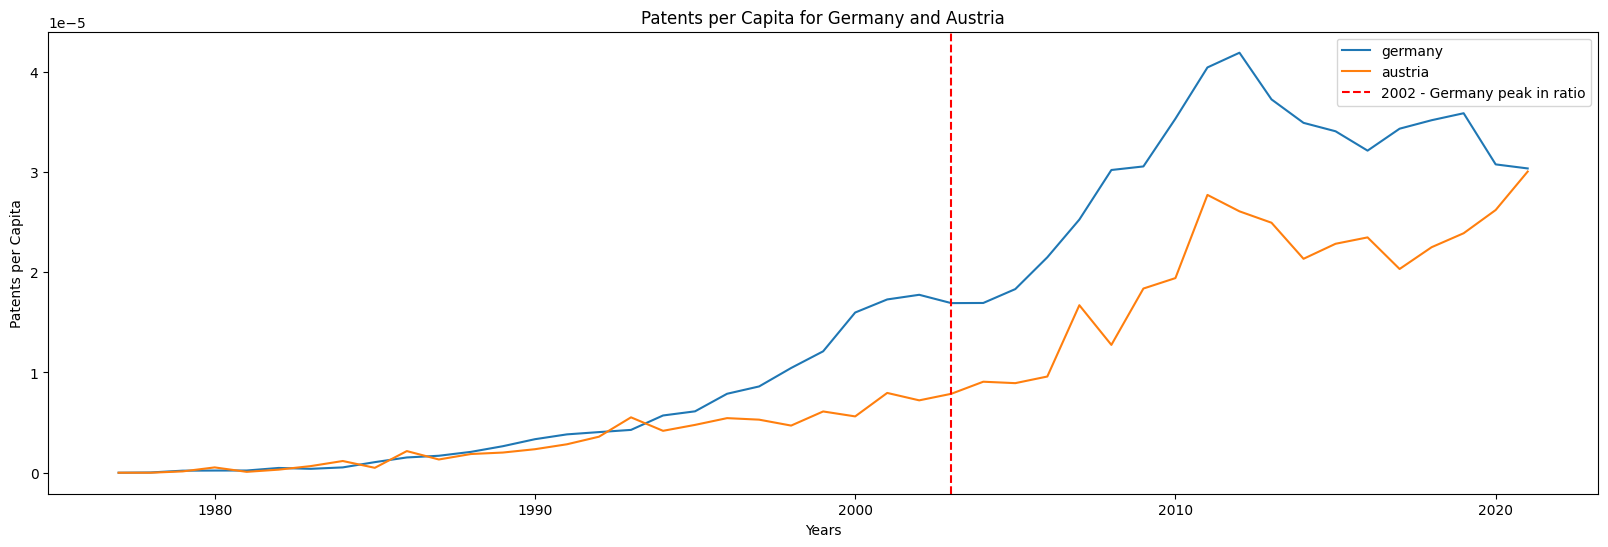

In [ ]:
#compare Germany and Austria
plt.figure(figsize=(20, 6))

sample = ['germany', 'austria']

for pays in sample:
    pays_data = ds[ds['Country'] == pays].sort_values('Year')
    plt.plot(pays_data['Year'], pays_data['Patent per Capita'], label=pays)

plt.axvline(x=2003, linestyle='--', color='red', label='2002 - Germany peak in ratio')
plt.xlabel('Years')
plt.ylabel('Patents per Capita')
plt.title('Patents per Capita for Germany and Austria')
plt.legend()
plt.show()

##Regression

###Developped Counrty

In [ ]:
#merge dataset for before and after the peak for germany and austria
dataset = pd.merge(ds, cata, on=['ISO', 'Year'], how='inner')
dataset = dataset.drop('Country_y', axis=1)
dataset.rename(columns={'Country_x': 'Country'}, inplace=True)

#create specific dataset with dummy
dataset_germany = dataset[dataset['Country'] == 'germany'].copy()
dataset_germany['after chock'] = (dataset_germany['Year'] > 2002).astype(int)
dataset_belgium = dataset[dataset['Country'] == 'belgium'].copy()
dataset_belgium['after chock'] = (dataset_belgium['Year'] > 2002).astype(int)
ger_bel = pd.concat([dataset_germany, dataset_belgium], ignore_index=True)
ger_bel['is Germany'] = (ger_bel['Country'] == 'germany').astype(int)
ger_bel

,Country,Patents number,Year,ISO,GDP,Population,Patent per Capita,Disaster Type,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",after chock,is Germany
0,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,8.0,NaN,2687818.0,0,1
1,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,7.0,NaN,1343909.0,0,1
2,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,NaN,NaN,134391.0,0,1
3,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,10.0,NaN,403173.0,0,1
4,germany,265.5333,1990,deu,22303.961327,79433029.0,0.000003,storm,15.0,NaN,2687818.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,belgium,150.1714,2020,bel,45517.903818,11538604.0,0.000013,storm,NaN,NaN,NaN,1,0
127,belgium,150.1714,2020,bel,45517.903818,11538604.0,0.000013,extreme temperature,1687.0,NaN,NaN,1,0
128,belgium,149.7833,2021,bel,51268.388037,11592952.0,0.000013,flood,39.0,101950.0,2160056.0,1,0
129,belgium,149.7833,2021,bel,51268.388037,11592952.0,0.000013,storm,NaN,NaN,NaN,1,0


In [ ]:
#computation with patent per capita
ger_bel['After Chock Gemrany'] = ger_bel['is Germany'] * ger_bel['after chock']

model = sm.OLS(ger_bel['Patent per Capita'],
               sm.add_constant(ger_bel[['is Germany', 'after chock', 'After Chock Gemrany']]))

results = model.fit(cov_type='HC1')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Patent per Capita   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     159.7
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           6.46e-43
Time:                        16:43:18   Log-Likelihood:                 1402.3
No. Observations:                 131   AIC:                            -2797.
Df Residuals:                     127   BIC:                            -2785.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.324e-06   6

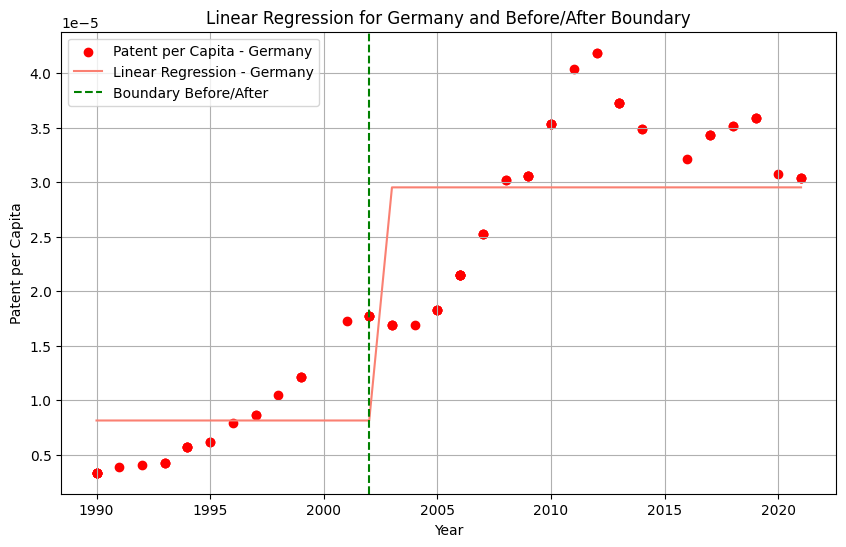

In [ ]:
#Regression shift for germany
germany_data = ger_bel[ger_bel['is Germany'] == 1]

model_germany = sm.OLS(germany_data['Patent per Capita'],
                        sm.add_constant(germany_data[['after chock', 'After Chock Gemrany']]))

results_germany = model_germany.fit()

predictions_germany = results_germany.predict()

plt.figure(figsize=(10, 6))

#Add point cloud and regression
plt.scatter(germany_data['Year'], germany_data['Patent per Capita'], label='Patent per Capita - Germany', color='red')
plt.plot(germany_data['Year'], predictions_germany, label='Linear Regression - Germany', color='salmon')

#put the shift line
plt.axvline(x=2002, color='green', linestyle='--', label='Boundary Before/After')

plt.xlabel('Year')
plt.ylabel('Patent per Capita')
plt.title('Linear Regression for Germany and Before/After Boundary')
plt.legend()
plt.grid(True)
plt.show()

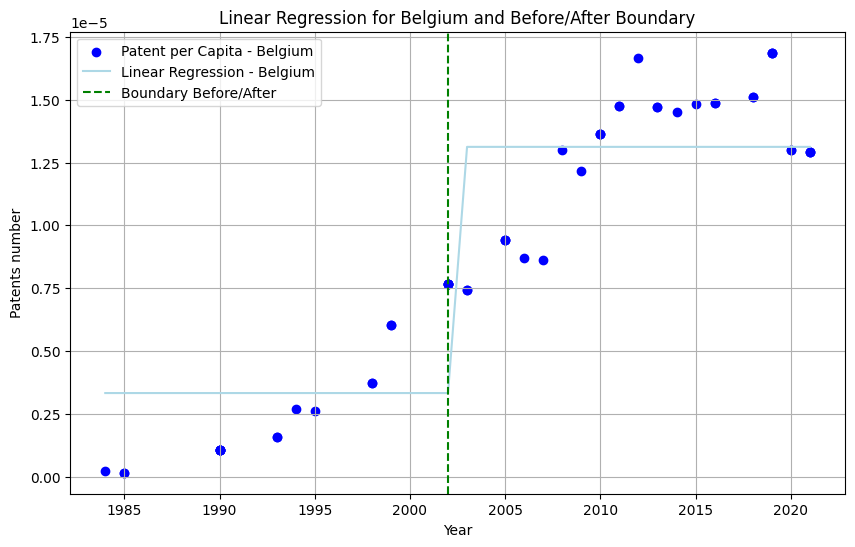

In [ ]:
#regression for Austria
belgium_data = ger_bel[ger_bel['is Germany'] == 0]

model_belgium = sm.OLS(belgium_data['Patent per Capita'],
                        sm.add_constant(belgium_data[['after chock', 'After Chock Gemrany']]))

results_belgium = model_belgium.fit()

predictions_belgium = results_belgium.predict()

plt.figure(figsize=(10, 6))

#Add point cloud and regression
plt.scatter(belgium_data['Year'], belgium_data['Patent per Capita'], label='Patent per Capita - Belgium', color='blue')
plt.plot(belgium_data['Year'], predictions_belgium, label='Linear Regression - Belgium', color='lightblue')

#put the shift line
plt.axvline(x=2002, color='green', linestyle='--', label='Boundary Before/After')

plt.xlabel('Year')
plt.ylabel('Patents number')
plt.title('Linear Regression for Belgium and Before/After Boundary')
plt.legend()
plt.grid(True)
plt.show()

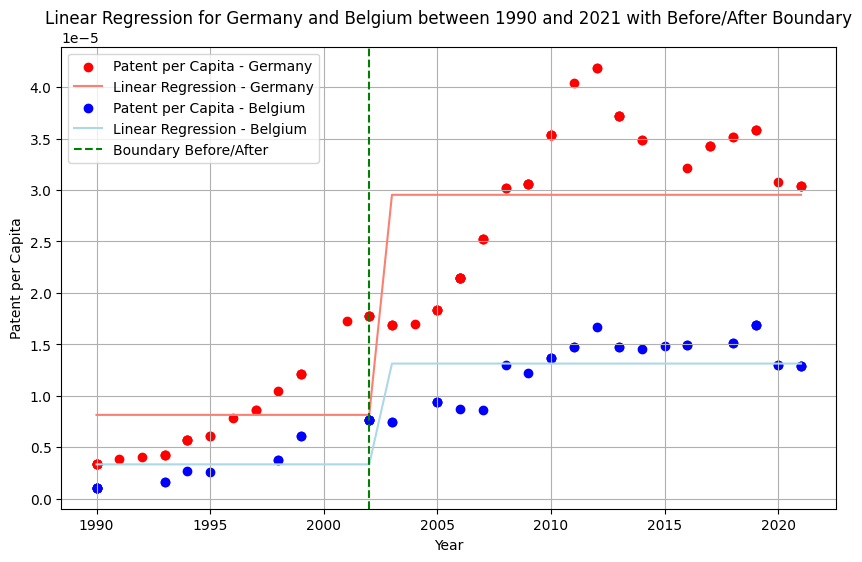

In [ ]:
def difdifger_bel():
  plt.figure(figsize=(10, 6))

#Sort data from 1990 to 2021
  germany_data_filtered = germany_data[(germany_data['Year'] >= 1990) & (germany_data['Year'] <= 2021)]
  predictions_germany_filtered = predictions_germany[(germany_data['Year'] >= 1990) & (germany_data['Year'] <= 2021)]

  belgium_data_filtered = belgium_data[(belgium_data['Year'] >= 1990) & (belgium_data['Year'] <= 2021)]
  predictions_belgium_filtered = predictions_belgium[(belgium_data['Year'] >= 1990) & (belgium_data['Year'] <= 2021)]

#regression for germany
  plt.scatter(germany_data_filtered['Year'], germany_data_filtered['Patent per Capita'], label='Patent per Capita - Germany', color='red')
  plt.plot(germany_data_filtered['Year'], predictions_germany_filtered, label='Linear Regression - Germany', color='salmon')

#regression for austria
  plt.scatter(belgium_data_filtered['Year'], belgium_data_filtered['Patent per Capita'], label='Patent per Capita - Belgium', color='blue')
  plt.plot(belgium_data_filtered['Year'], predictions_belgium_filtered, label='Linear Regression - Belgium', color='lightblue')

#shift line
  plt.axvline(x=2002, color='green', linestyle='--', label='Boundary Before/After')

  plt.xlabel('Year')
  plt.ylabel('Patent per Capita')
  plt.title('Linear Regression for Germany and Belgium between 1990 and 2021 with Before/After Boundary')
  plt.legend()
  plt.grid(True)
  plt.show()

difdifger_bel()

###Developping Country

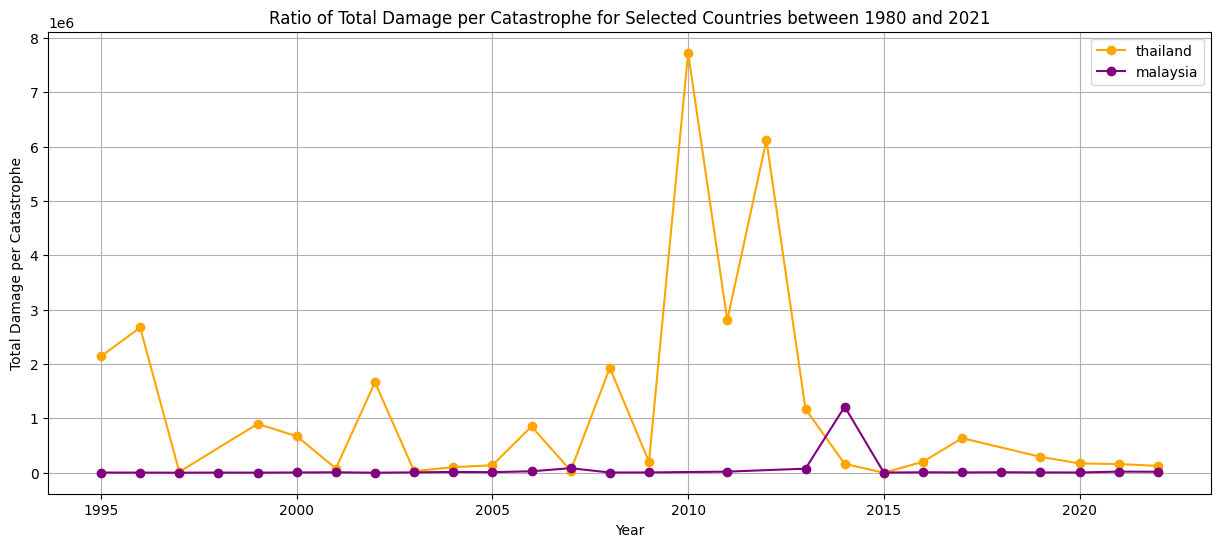

In [ ]:
#Ratio
def ratiotha_mal():
  sample = ['thailand', 'malaysia']

  plt.figure(figsize=(15, 6))
  for pays in sample:
    data_selected = cata[(cata['Country'] == pays) & (cata['Year'].between(1995, 2022))]
    catastrophes_per_year = data_selected['Year'].value_counts().sort_index()
    damage_per_year = data_selected.groupby('Year')["Total Affected"].sum().fillna(0)

    ratio = damage_per_year / catastrophes_per_year

    if pays == 'malaysia':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='purple')
    elif pays == 'thailand':
            plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays, color='orange')

  #plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', label=pays)

  plt.xlabel('Year')
  plt.ylabel('Total Damage per Catastrophe')
  plt.title('Ratio of Total Damage per Catastrophe for Selected Countries between 1980 and 2021')
  plt.legend()
  plt.grid(True)
  plt.show()

ratiotha_mal()

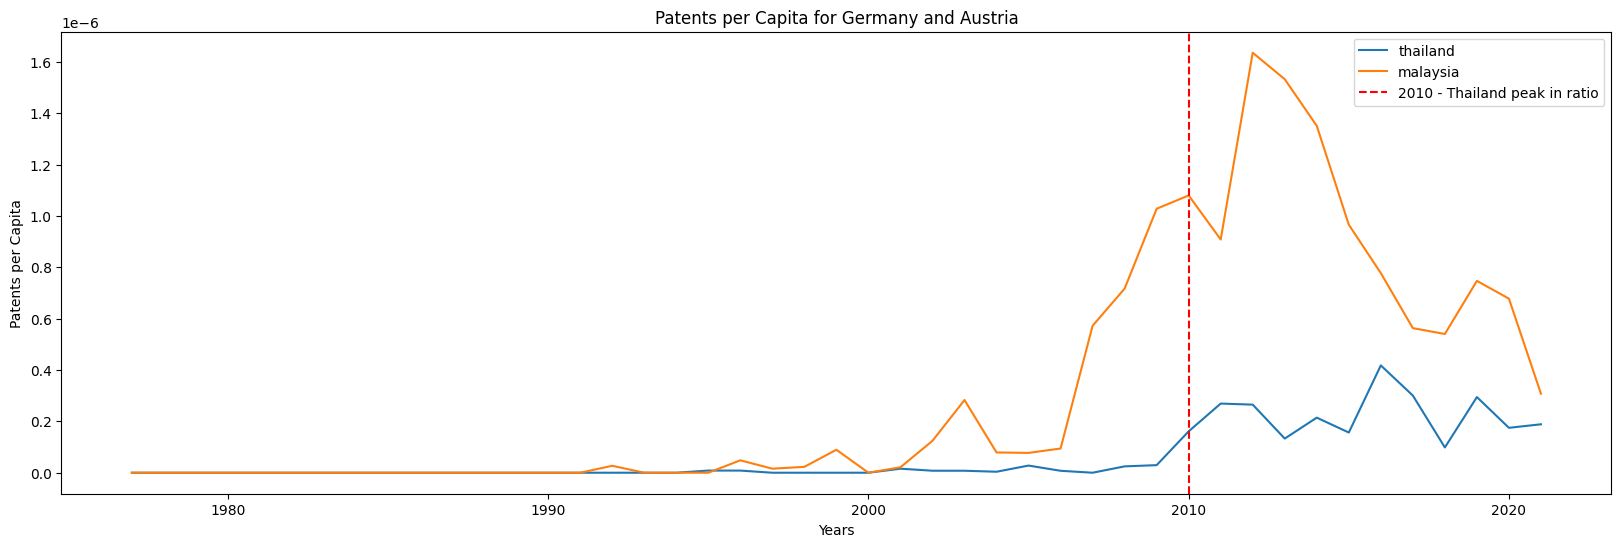

In [ ]:
#compare Germany and Austria
plt.figure(figsize=(20, 6))

sample = ['thailand', 'malaysia']

for pays in sample:
    pays_data = ds[ds['Country'] == pays].sort_values('Year')
    plt.plot(pays_data['Year'], pays_data['Patent per Capita'], label=pays)

plt.axvline(x=2010, linestyle='--', color='red', label='2010 - Thailand peak in ratio')
plt.xlabel('Years')
plt.ylabel('Patents per Capita')
plt.title('Patents per Capita for Germany and Austria')
plt.legend()
plt.show()

In [ ]:
#compare with Thailand and Malaysia
#create specific dataset with dummy
dataset_thailand = dataset[dataset['Country'] == 'thailand'].copy()
dataset_thailand['After Chock'] = (dataset_thailand['Year'] > 2010).astype(int)
dataset_malaysia = dataset[dataset['Country'] == 'malaysia'].copy()
dataset_malaysia['After Chock'] = (dataset_malaysia['Year'] > 2010).astype(int)
tha_mal = pd.concat([dataset_thailand, dataset_malaysia], ignore_index=True)
tha_mal['is Thailand'] = (tha_mal['Country'] == 'thailand').astype(int)

# Drop values before year 1995
tha_mal = tha_mal[tha_mal['Year'] >= 1995]

In [ ]:
tha_mal['After Chock Thailand'] = tha_mal['is Thailand'] * tha_mal['After Chock']

model = sm.OLS(tha_mal['Patent per Capita'],
               sm.add_constant(tha_mal[['is Thailand', 'After Chock', 'After Chock Thailand']]))

results = model.fit(cov_type='HC1')

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Patent per Capita   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     159.3
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           2.70e-49
Time:                        16:43:21   Log-Likelihood:                 2462.3
No. Observations:                 175   AIC:                            -4917.
Df Residuals:                     171   BIC:                            -4904.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.887e-07 

<ipython-input-101-6fe5a348970e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tha_mal['After Chock Thailand'] = tha_mal['is Thailand'] * tha_mal['After Chock']


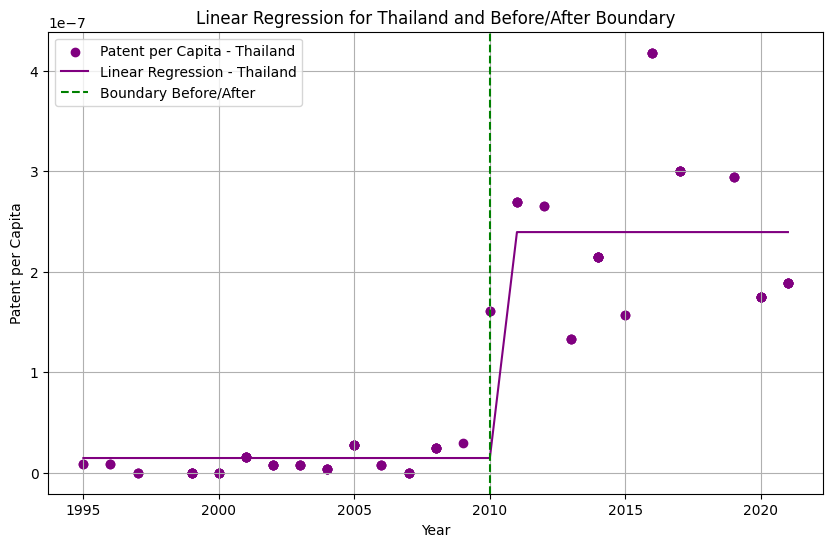

In [ ]:
#Regression shift for Thailand
thailand_data = tha_mal[tha_mal['is Thailand'] == 1]

model_thailand = sm.OLS(thailand_data['Patent per Capita'],
                        sm.add_constant(thailand_data[['After Chock', 'After Chock Thailand']]))

results_thailand = model_thailand.fit()

predictions_thailand = results_thailand.predict()

plt.figure(figsize=(10, 6))

#Add point cloud and regression
plt.scatter(thailand_data['Year'], thailand_data['Patent per Capita'], label='Patent per Capita - Thailand', color='purple')
plt.plot(thailand_data['Year'], predictions_thailand, label='Linear Regression - Thailand', color='purple')

#put the shift line
plt.axvline(x=2010, color='green', linestyle='--', label='Boundary Before/After')

plt.xlabel('Year')
plt.ylabel('Patent per Capita')
plt.title('Linear Regression for Thailand and Before/After Boundary')
plt.legend()
plt.grid(True)
plt.show()

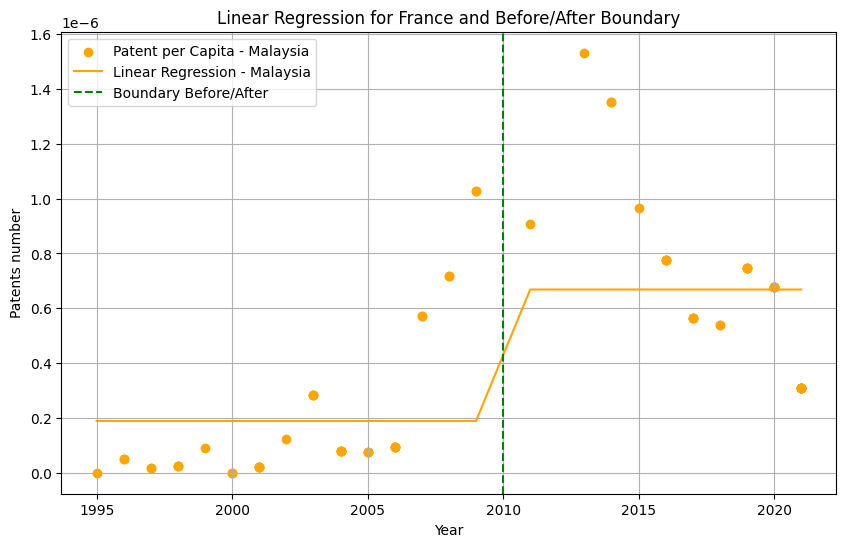

In [ ]:
#regression for france
malaysia_data = tha_mal[tha_mal['is Thailand'] == 0]

model_malaysia = sm.OLS(malaysia_data['Patent per Capita'],
                        sm.add_constant(malaysia_data[['After Chock', 'After Chock Thailand']]))

results_malaysia = model_malaysia.fit()

predictions_malaysia = results_malaysia.predict()

plt.figure(figsize=(10, 6))

#Add point cloud and regression
plt.scatter(malaysia_data['Year'], malaysia_data['Patent per Capita'], label='Patent per Capita - Malaysia', color='orange')
plt.plot(malaysia_data['Year'], predictions_malaysia, label='Linear Regression - Malaysia', color='orange')

#put the shift line
plt.axvline(x=2010, color='green', linestyle='--', label='Boundary Before/After')

plt.xlabel('Year')
plt.ylabel('Patents number')
plt.title('Linear Regression for France and Before/After Boundary')
plt.legend()
plt.grid(True)
plt.show()

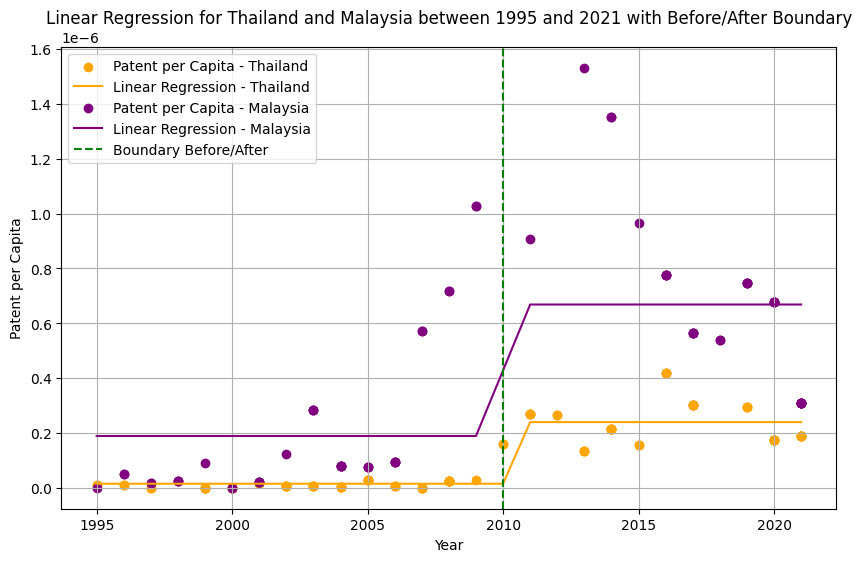

In [ ]:
def difdiftha_mal():
  plt.figure(figsize=(10, 6))

#Sort data from 1990 to 2021
  thailand_data_filtered = thailand_data[(thailand_data['Year'] >= 1995) & (thailand_data['Year'] <= 2021)]
  predictions_thailand_filtered = predictions_thailand[(thailand_data['Year'] >= 1995) & (thailand_data['Year'] <= 2021)]

  malaysia_data_filtered = malaysia_data[(malaysia_data['Year'] >= 1995) & (malaysia_data['Year'] <= 2021)]
  predictions_malaysia_filtered = predictions_malaysia[(malaysia_data['Year'] >= 1995) & (malaysia_data['Year'] <= 2021)]

#regression for Brazil
  plt.scatter(thailand_data_filtered['Year'], thailand_data_filtered['Patent per Capita'], label='Patent per Capita - Thailand', color='orange')
  plt.plot(thailand_data_filtered['Year'], predictions_thailand_filtered, label='Linear Regression - Thailand', color='orange')

#regression for germany
  plt.scatter(malaysia_data_filtered['Year'], malaysia_data_filtered['Patent per Capita'], label='Patent per Capita - Malaysia', color='purple')
  plt.plot(malaysia_data_filtered['Year'], predictions_malaysia_filtered, label='Linear Regression - Malaysia', color='purple')

#shift line
  plt.axvline(x=2010, color='green', linestyle='--', label='Boundary Before/After')

  plt.xlabel('Year')
  plt.ylabel('Patent per Capita')
  plt.title('Linear Regression for Thailand and Malaysia between 1995 and 2021 with Before/After Boundary')
  plt.legend()
  plt.grid(True)
  plt.show()

difdiftha_mal()

In [ ]:
#code theory
def graphe():
    x1 = np.linspace(0, 10, 100)
    y1 = 1.5 * x1 + 4

    x2 = np.linspace(0, 10, 100)
    y2 = x2 + 4

    x3 = np.linspace(0, 10, 100)
    y3 = x3 + 2

    plt.figure(figsize=(8, 6))
    plt.plot(x1, y1, color='orange', label='Treated group')
    plt.plot(x2, y2, linestyle='--', color='orange', label='Hypothetical treated group without treatment')
    plt.plot(x3, y3, color='green', label='Control group')

    plt.text(x1[0], y1[0], 'c', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x1[-1], y1[-1], 'd', fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x2[0], y2[0], '', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x2[-1], y2[-1], "d'", fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x3[0], y3[0], 'a', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x3[-1], y3[-1], 'b', fontsize=12, color='black', ha='right', va='bottom')

    plt.title('DID theoretical model')
    plt.xlabel('Time')
    plt.ylabel('Outcome')
    plt.legend()

    return plt.show()


#APPENDIX

In [ ]:
# Adding fixed effects on country and time level
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          158.78     11.790     13.468     0.0000      135.66      181.90
total_affected -2.689e-06  6.987e-07    -3.8486     0.0001  -4.059e-06  -1.319e-06


In [ ]:
# adding GDP as control
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -85.954     25.476    -3.3739     0.0008     -135.92     -35.990
total_affected -2.631e-06  6.785e-07    -3.8775     0.0001  -3.962e-06    -1.3e-06
GDP                0.0191     0.0018     10.754     0.0000      0.0156      0.0226


In [ ]:
# adding FDI direct investment as control
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + FDI +  EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -89.133     23.572    -3.7813     0.0002     -135.36     -42.903
total_affected -2.497e-06  6.278e-07    -3.9766     0.0001  -3.728e-06  -1.265e-06
GDP                0.0135     0.0017     8.0690     0.0000      0.0102      0.0168
FDI             5.308e-09   2.97e-10     17.872     0.0000   4.725e-09    5.89e-09


In [ ]:
# adding consumption as control
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + FDI + consumption + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -749.35     163.75    -4.5762     0.0000     -1070.5     -428.20
total_affected -2.494e-06  6.253e-07    -3.9894     0.0001  -3.721e-06  -1.268e-06
GDP                0.0141     0.0017     8.4521     0.0000      0.0109      0.0174
FDI             5.307e-09  2.958e-10     17.944     0.0000   4.727e-09   5.887e-09
consumption        8.4651     2.0779     4.0739     0.0000      4.3899      12.540


In [ ]:
# adding population as control
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + FDI + consumption + Population + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -1155.4     175.52    -6.5831     0.0000     -1499.7     -811.22
total_affected -2.614e-06  6.197e-07    -4.2182     0.0000   -3.83e-06  -1.399e-06
GDP                0.0171     0.0017     9.9015     0.0000      0.0137      0.0205
FDI             4.844e-09  3.028e-10     15.998     0.0000    4.25e-09   5.438e-09
consumption        11.311     2.1114     5.3573     0.0000      7.1705      15.452
Population       1.79e-06  2.953e-07     6.0615     0.0000   1.211e-06   2.369e-06


In [ ]:
# adding tertiary education enrolment rate as control (complete panel regression)
can = PanelOLS.from_formula("patents_number ~ 1 + total_damage + GDP + FDI + consumption + Population + Tertiary + EntityEffects + TimeEffects",
                            data=merged_final.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept       -1068.6     179.42    -5.9562     0.0000     -1420.5     -716.76
total_damage  7.248e-06  1.096e-06     6.6154     0.0000     5.1e-06   9.397e-06
GDP              0.0161     0.0018     9.1729     0.0000      0.0126      0.0195
FDI            4.53e-09   3.05e-10     14.851     0.0000   3.932e-09   5.128e-09
consumption      10.712     2.0989     5.1034     0.0000      6.5952      14.828
Population    1.512e-06   2.97e-07     5.0905     0.0000   9.294e-07   2.094e-06
Tertiary        -0.5276     1.0255    -0.5145     0.6070     -2.5387      1.4836


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = merged_final[['total_affected', 'GDP', 'FDI', 'consumption', 'Population', 'Tertiary']]

# Handling missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Adding a constant for VIF calculation
X = add_constant(X)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying the VIF values
print("Variance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
         Variable        VIF
0           const  67.214617
1  total_affected   1.509495
2             GDP   1.671789
3             FDI   1.300249
4     consumption   1.148311
5      Population   1.816461
6        Tertiary   1.487251


## EDA

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


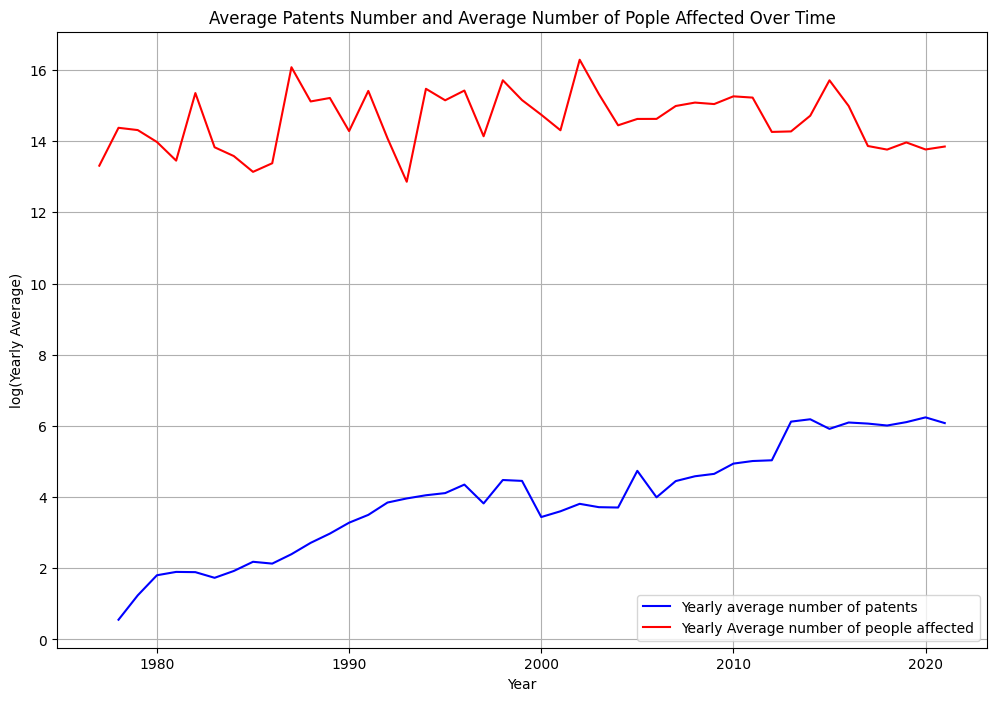

In [ ]:
avg_patents_by_year = merged_final.groupby('Year')['patents_number'].mean().reset_index().dropna()
avg_damage_by_year = merged_final.groupby('Year')['total_affected'].mean().reset_index().dropna()
plt.figure(figsize=(12, 8))
plt.plot(avg_patents_by_year['Year'], np.log(avg_patents_by_year['patents_number']), linestyle='-', color='b', label='Yearly average number of patents')
plt.plot(avg_damage_by_year['Year'], np.log(avg_damage_by_year['total_affected']), linestyle='-', color='r', label='Yearly Average number of people affected')

plt.title('Average Patents Number and Average Number of Pople Affected Over Time')
plt.xlabel('Year')
plt.ylabel('log(Yearly Average)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-114-159b6d980f25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_final.corr()


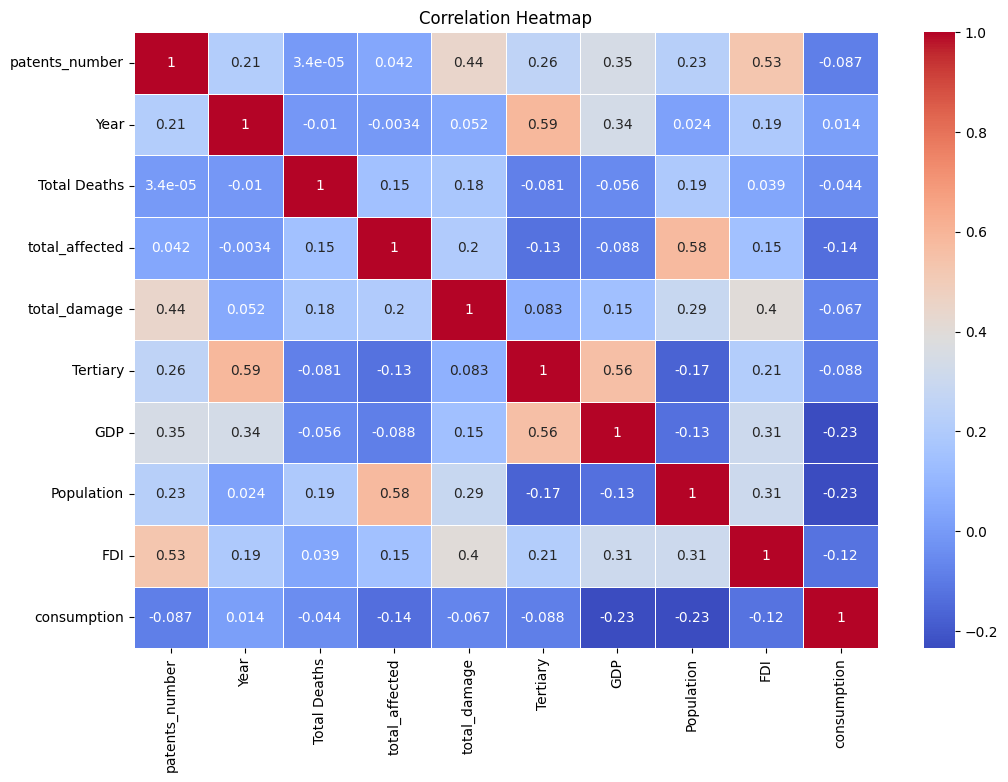

In [ ]:
plt.figure(figsize=(12,8))
correlation_matrix = merged_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'Scatter Plot with Regression Line')

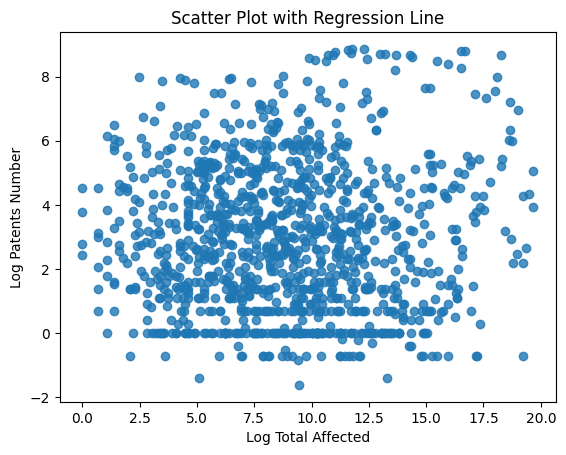

In [ ]:
# Plot the scatterplot with a regression line after taking the logarithm
sns.regplot(x=np.log(merged_final['total_affected']), y=np.log(merged_final['patents_number']))

# Add labels, titles, or other plot customizations as needed
plt.ylabel("Log Patents Number")
plt.xlabel("Log Total Affected")
plt.title("Scatter Plot with Regression Line")

In [ ]:
def graphe():
    x1 = np.linspace(0, 10, 100)
    y1 = 1.5 * x1 + 4

    x2 = np.linspace(0, 10, 100)
    y2 = x2 + 4

    x3 = np.linspace(0, 10, 100)
    y3 = x3 + 2

    plt.figure(figsize=(8, 6))
    plt.plot(x1, y1, color='orange', label='Tested group')
    plt.plot(x2, y2, linestyle='--', color='orange', label='Hypothetical tested group without treatment')
    plt.plot(x3, y3, color='green', label='Control group')

    plt.text(x1[0], y1[0], 'c', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x1[-1], y1[-1], 'd', fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x2[0], y2[0], '', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x2[-1], y2[-1], "d'", fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x3[0], y3[0], 'a', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x3[-1], y3[-1], 'b', fontsize=12, color='black', ha='right', va='bottom')

    plt.title('DID theoretical model')
    plt.xlabel('Time')
    plt.ylabel('Outcome')
    plt.legend()

    return plt.show()


## Merging dataframes - [OLD]

In [ ]:
merged = pd.merge(patents_new,catastrophy, on=(['ISO','Year']), how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [ ]:
merged = pd.merge(merged,gdp, on=(['ISO','Year']), how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [ ]:
merged = pd.merge(merged, fdi, on=['ISO','Year'], how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [ ]:
merged = pd.merge(merged, reframed_government, on=['ISO','Year'], how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [ ]:
#merged = pd.merge(merged, climate_worriness, on=['ISO'], how='left')
#merged = merged.drop(columns='Country_y')
#merged = merged.rename(columns={'Country_x':'Country'})

In [ ]:
merged = pd.merge(merged, education, on=['ISO','Year'], how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [ ]:
merged = pd.merge(merged, education, on=['ISO','Year'], how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [ ]:
merged = pd.merge(merged, pop, on=['ISO','Year'], how='left')
merged = merged.drop(columns='Country_y')
merged = merged.rename(columns={'Country_x':'Country'})

In [ ]:
merged = merged.rename(columns={'Patents number': 'patents_number', 'Total Affected': 'total_affected', 'Total Damage, Adjusted (\'000 US$)':'total_damage'})
merged = merged.dropna(subset=['Disaster Type'])
merged = merged.dropna(thresh=6)
merged = merged[(merged['Year'] > 1971)]

In [ ]:
def graphe():
    x1 = np.linspace(0, 10, 100)
    y1 = 1.5 * x1 + 4

    x2 = np.linspace(0, 10, 100)
    y2 = x2 + 4

    x3 = np.linspace(0, 10, 100)
    y3 = x3 + 2

    plt.figure(figsize=(8, 6))
    plt.plot(x1, y1, color='orange', label='Tested group')
    plt.plot(x2, y2, linestyle='--', color='orange', label='Hypothetical tested group without treatment')
    plt.plot(x3, y3, color='green', label='Control group')

    plt.text(x1[0], y1[0], 'c', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x1[-1], y1[-1], 'd', fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x2[0], y2[0], '', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x2[-1], y2[-1], "d'", fontsize=12, color='black', ha='right', va='bottom')

    plt.text(x3[0], y3[0], 'a', fontsize=12, color='black', ha='right', va='bottom')
    plt.text(x3[-1], y3[-1], 'b', fontsize=12, color='black', ha='right', va='bottom')

    plt.title('DID theoretical model')
    plt.xlabel('Time')
    plt.ylabel('Outcome')
    plt.legend()

    return plt.show()


## Shit not working



## secondary education

In [ ]:
# cleaning dataset with secondary education enrolment rate

second_edu

NameError: ignored

In [ ]:
second_edu = second_edu.drop(["Series Name", "Series Code"],axis=1)
second_edu['Country Name'] = second_edu["Country Name"].str.lower()

In [ ]:
second_edu.columns = second_edu.columns.str.replace(r'\s*\[YR[0-9]+\]\s*', '', regex=True)

In [ ]:
data = [['Country Name', 'Country Code', 'Year', 'Secondary']]

for index, row in second_edu.iterrows():
    country_name = row['Country Name']
    country_code = row['Country Code']
    for col in second_edu.columns[2:]:
        year = int(col)
        secondary = row[col]
        data.append([country_name, country_code, year, secondary])

# Create a new dataframe with data restructuring
second_edu = pd.DataFrame(data[1:], columns=data[0])
second_edu.reset_index(drop=True, inplace=True)


In [ ]:
second_edu  = second_edu.rename(columns={'Country Code':'ISO',"Country Name":'Country'})
second_edu['ISO'] = second_edu['ISO'].str.lower().astype('string')
second_edu['Secondary'] = second_edu['Secondary'].replace('..', pd.NA)

In [ ]:
second_edu = second_edu.dropna(subset='Secondary')

In [ ]:
second_edu.info()

## Back to merged not working

In [ ]:
merged['FDI_per_GDP'] = (merged['FDI'] / (merged['GDP'] * merged['Population'])) * 100

In [ ]:
merged_nona = merged.dropna(subset=['ISO', 'patents_number', 'Year', 'GDP', 'Value', 'Secondary', 'Population'])

In [ ]:
merged_nona

In [ ]:
merged

In [ ]:
catakeep = ['drought', 'flood', 'extreme temperature', 'storm', 'wildfire', 'glacial lake outburst flood'] # WHY?
merged_filtevn = merged_nona[merged_nona['Disaster Type'].isin(catakeep)]

In [ ]:
merged_filtevn

In [ ]:
merged_filtevn['patent_cap'] = merged_filtevn['patents_number'] / merged_filtevn['Population']

In [ ]:
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + FDI_per_GDP + Value + GDP + Population + EntityEffects + TimeEffects ",
                            data=merged.set_index(["ISO",'Year']))
result = can.fit()
print(result.summary.tables[1])

In [ ]:
# no controls nor FE
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + EntityEffects",
                            data=merged_.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]


In [ ]:
merged_filtevn.info()

In [ ]:
# no controls nor FE
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + Population  + EntityEffects + TimeEffects",
                            data=merged_filtevn.set_index(["ISO",'Year']))
result = can.fit()
result.summary.tables[1]


In [ ]:
# TOTAL DAMAGE
can = PanelOLS.from_formula("patents_number ~ 1 + total_damage + GDP + Population + EntityEffects + TimeEffects",
                            data=merged_filtevn.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]

In [ ]:
# no controls nor FE
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected",
                            data=merged_nona.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]


In [ ]:
#check with fixed effect
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + EntityEffects",
                            data=merged_nona.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]



In [ ]:
can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + EntityEffects",
                            data=merged_nona.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]


In [ ]:
'''can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + + EntityEffects",
                            data=merged_nona.set_index(["Country",'Year']))
result = can.fit()
result.summary.tables[1]
'''

In [ ]:
# can = PanelOLS.from_formula("patents_number ~ 1 + total_affected + GDP + Tertiary + EntityEffects", check_rank = False, drop_absorbed=True,
#                             data=merged_nona.set_index(["Country",'Year']))
# result = can.fit()
# result.summary.tables[1]